In [ ]:
# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime




count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
14504


/tmp/ipykernel_106/1390435316.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


0     Санкт-Петербург          
1     посёлок Шушары           
2     Санкт-Петербург          
3     Санкт-Петербург          
4     Санкт-Петербург          
5     городской посёлок Янино-1
6     посёлок Парголово        
7     Санкт-Петербург          
8     посёлок Мурино           
9     Санкт-Петербург          
10    Санкт-Петербург          
11    Ломоносов                
12    Сертолово                
13    Петергоф                 
14    Пушкин                   
15    Санкт-Петербург          
16    Санкт-Петербург          
17    Санкт-Петербург          
18    Санкт-Петербург          
19    Санкт-Петербург          
Name: locality_name, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_a

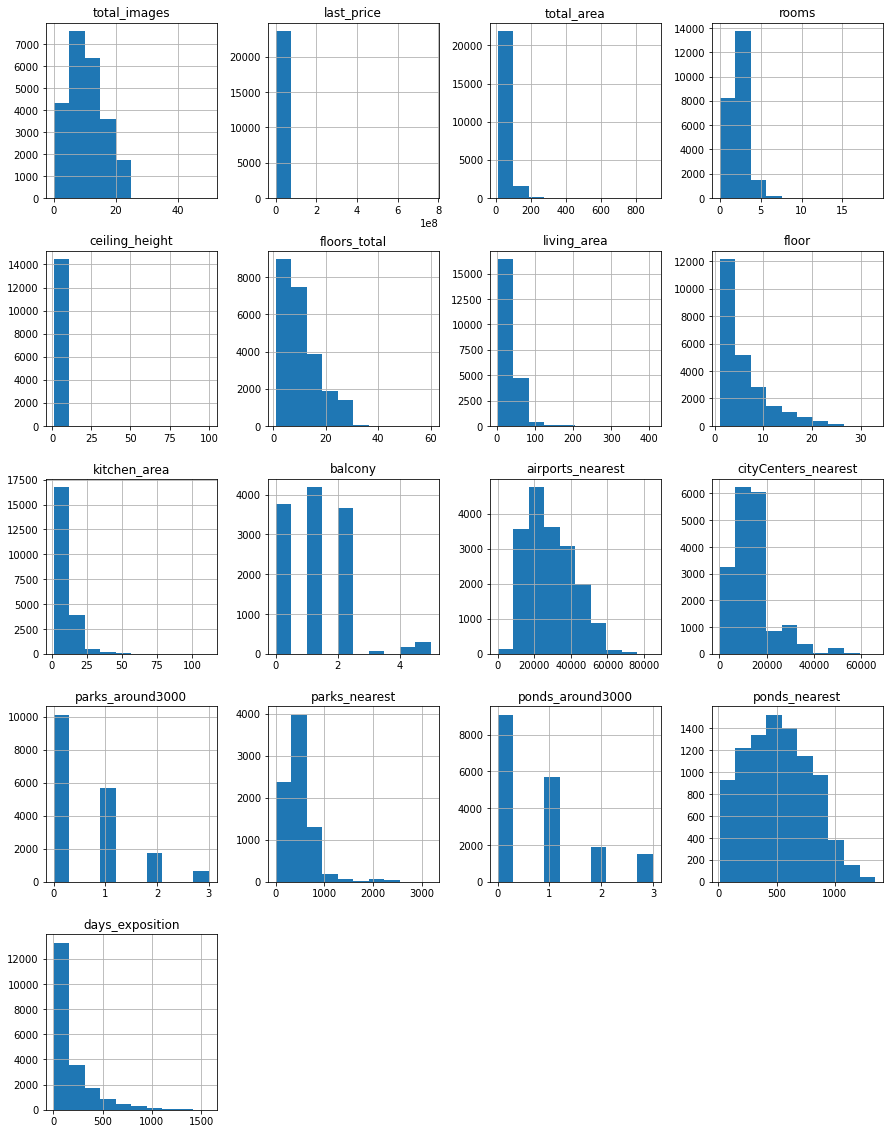

In [2]:

data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

print(data['ceiling_height'].describe())
print(data['ceiling_height'].count())

old_ceiling_height = data['ceiling_height'].count() 
old_last_price = data['last_price'].count()  



print(data['locality_name'].head(20))

data.info()
#print(data.value_counts()) 
data.hist(figsize=(15,20))
data.columns

print(data['locality_name'].head(20))


ВЫВОД

# Предобработка данных

Определяем количество пропусков

In [3]:

data.isna().sum()

#ceiling_height           9195
#floors_total               86
#living_area              1903

#is_apartment            20924

#kitchen_area             2278

#locality_name              49
#airports_nearest         5542
#cityCenters_nearest      5519
#parks_around3000         5518
#parks_nearest           15620
#ponds_around3000         5518
#ponds_nearest           14589
#days_exposition          3181


total_images            0    
last_price              0    
total_area              0    
first_day_exposition    0    
rooms                   0    
ceiling_height          9195 
floors_total            86   
living_area             1903 
floor                   0    
is_apartment            20924
studio                  0    
open_plan               0    
kitchen_area            2278 
balcony                 11519
locality_name           49   
airports_nearest        5542 
cityCenters_nearest     5519 
parks_around3000        5518 
parks_nearest           15620
ponds_around3000        5518 
ponds_nearest           14589
days_exposition         3181 
dtype: int64

Определяем неинформативные признаки

In [4]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

total_images - 0%
last_price - 0%
total_area - 0%
first_day_exposition - 0%
rooms - 0%
ceiling_height - 39%
floors_total - 0%
living_area - 8%
floor - 0%
is_apartment - 88%
studio - 0%
open_plan - 0%
kitchen_area - 10%
balcony - 49%
locality_name - 0%
airports_nearest - 23%
cityCenters_nearest - 23%
parks_around3000 - 23%
parks_nearest - 66%
ponds_around3000 - 23%
ponds_nearest - 62%
days_exposition - 13%


Заполняем пропуски

In [5]:
data['balcony']=data['balcony'].fillna(0) 
print(data['balcony'].head(20))
data['balcony'].isna().sum()


0     0.0
1     2.0
2     0.0
3     0.0
4     0.0
5     0.0
6     1.0
7     2.0
8     0.0
9     2.0
10    0.0
11    1.0
12    0.0
13    1.0
14    0.0
15    1.0
16    0.0
17    1.0
18    1.0
19    0.0
Name: balcony, dtype: float64


0

In [6]:
data.info()
print(data['last_price'].head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())  
print(data['ceiling_height'].head(20))
data['ceiling_height'].isna().sum()
data.info()
data['ceiling_height'].describe()



0     2.70
1     2.65
2     2.65
3     2.65
4     3.03
5     2.65
6     2.65
7     2.65
8     2.65
9     2.50
10    2.67
11    2.65
12    2.65
13    2.56
14    2.65
15    2.65
16    3.05
17    2.65
18    2.50
19    2.75
Name: ceiling_height, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio           

count    23699.000000
mean     2.724358    
std      0.988298    
min      1.000000    
25%      2.600000    
50%      2.650000    
75%      2.700000    
max      100.000000  
Name: ceiling_height, dtype: float64

In [8]:
data['floors_total']=data['floors_total'].astype('object') 
data['floors_total'].unique()
data['floors_total']=data['floors_total'].fillna('unknoun')  
print(data['floors_total'].head(20))
data['floors_total'].isna().sum()
data['floors_total'].unique()

0     16.0
1     11.0
2     5.0 
3     14.0
4     14.0
5     12.0
6     26.0
7     24.0
8     27.0
9     9.0 
10    12.0
11    5.0 
12    5.0 
13    5.0 
14    6.0 
15    14.0
16    5.0 
17    17.0
18    5.0 
19    16.0
Name: floors_total, dtype: object


array([16.0, 11.0, 5.0, 14.0, 12.0, 26.0, 24.0, 27.0, 9.0, 6.0, 17.0,
       25.0, 3.0, 23.0, 19.0, 18.0, 4.0, 22.0, 8.0, 2.0, 10.0, 7.0, 13.0,
       15.0, 'unknoun', 20.0, 28.0, 36.0, 21.0, 35.0, 34.0, 60.0, 1.0,
       29.0, 33.0, 52.0, 37.0], dtype=object)

data['is_apartment'].unique()
data['is_apartment']=data['is_apartment'].fillna(False)  
print(data['is_apartment'].head(20))
print(data['is_apartment'].isna().sum())
data['is_apartment'].unique()

In [11]:
data['kitchen_area']=data['kitchen_area'].fillna(data['kitchen_area'].median())  
print(data['kitchen_area'].head(20))
data['kitchen_area'].isna().sum()

0     25.00
1     11.00
2     8.30 
3     9.10 
4     41.00
5     9.10 
6     14.40
7     18.90
8     8.81 
9     6.50 
10    8.50 
11    6.00 
12    9.00 
13    5.20 
14    8.00 
15    7.60 
16    9.00 
17    11.00
18    5.60 
19    12.00
Name: kitchen_area, dtype: float64


0

In [12]:
data['locality_name'].unique()     
data['locality_name']=data['locality_name'].fillna(0) 
print(data['locality_name'].head(20))
data['locality_name'].isna().sum() 

0     Санкт-Петербург          
1     посёлок Шушары           
2     Санкт-Петербург          
3     Санкт-Петербург          
4     Санкт-Петербург          
5     городской посёлок Янино-1
6     посёлок Парголово        
7     Санкт-Петербург          
8     посёлок Мурино           
9     Санкт-Петербург          
10    Санкт-Петербург          
11    Ломоносов                
12    Сертолово                
13    Петергоф                 
14    Пушкин                   
15    Санкт-Петербург          
16    Санкт-Петербург          
17    Санкт-Петербург          
18    Санкт-Петербург          
19    Санкт-Петербург          
Name: locality_name, dtype: object


0

In [13]:
data['parks_around3000'].unique()     
data['parks_around3000']=data['parks_around3000'].fillna(0) 
print(data['parks_around3000'].head(20))
data['parks_around3000'].isna().sum()     

0     1.0
1     0.0
2     1.0
3     2.0
4     2.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    1.0
11    0.0
12    0.0
13    1.0
14    0.0
15    1.0
16    3.0
17    0.0
18    1.0
19    0.0
Name: parks_around3000, dtype: float64


0

In [14]:
data['ponds_around3000'].unique()     
data['ponds_around3000']=data['ponds_around3000'].fillna(0) 
print(data['ponds_around3000'].head(20))
data['ponds_around3000'].isna().sum()

0     2.0
1     0.0
2     2.0
3     3.0
4     1.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    2.0
11    0.0
12    0.0
13    3.0
14    1.0
15    1.0
16    0.0
17    1.0
18    0.0
19    0.0
Name: ponds_around3000, dtype: float64


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  object 
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

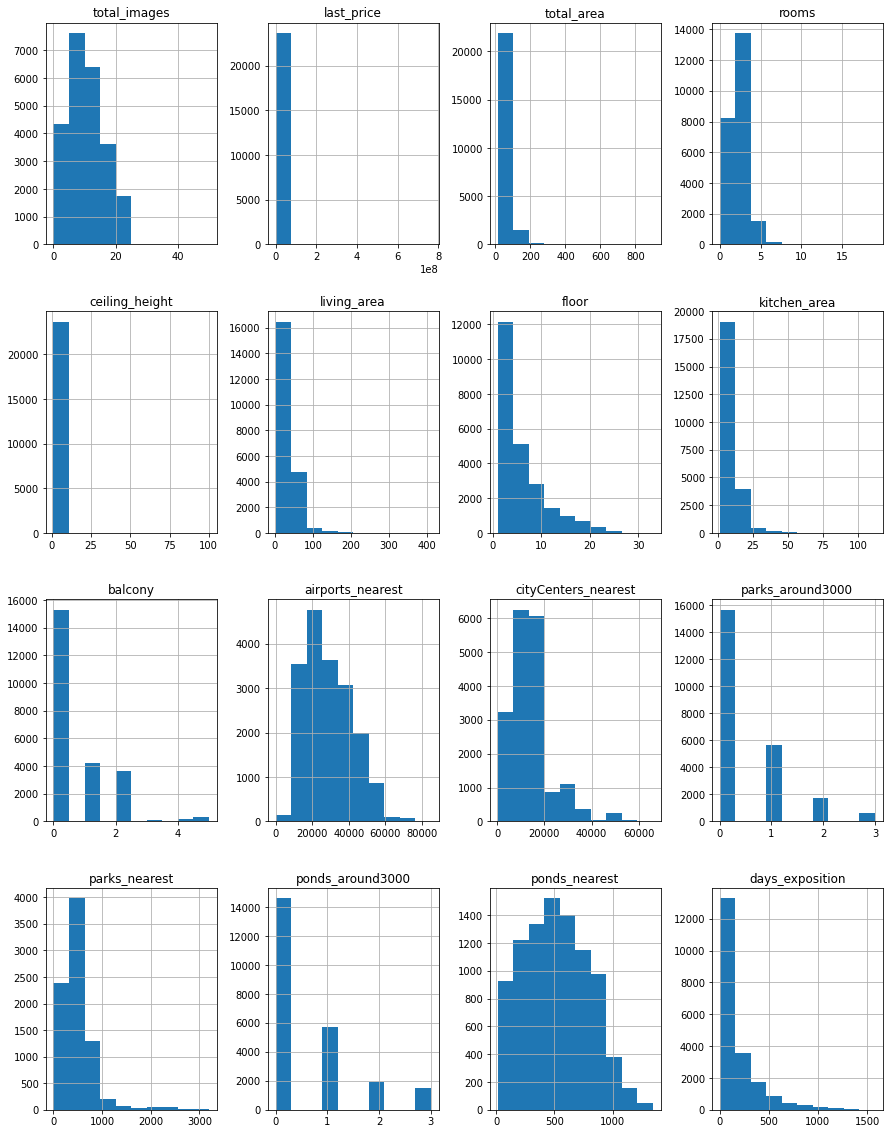

In [15]:
data.info()

data.hist(figsize=(15,20))
data.columns


Изменение типов данных.Меняем float64 на int64 для целочисленных переменных.

In [16]:
data.head(2)
data.dtypes

total_images            int64  
last_price              float64
total_area              float64
first_day_exposition    object 
rooms                   int64  
ceiling_height          float64
floors_total            object 
living_area             float64
floor                   int64  
is_apartment            bool   
studio                  bool   
open_plan               bool   
kitchen_area            float64
balcony                 float64
locality_name           object 
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [17]:

data['parks_around3000']=data['parks_around3000'].astype('int64')

data['locality_name']=data['locality_name'].astype('str')
print(type('locality_name'))
data.info()

<class 'str'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  object 
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airpo

Уникальные значения в столбце с названиями

In [18]:
locality_name_data = data['locality_name'].unique()
range(len(data['locality_name'].unique()))
locality_name=data['locality_name']
locality_name_unique = ['Санкт-Петербург', 'Шушары', 'Янино-1',
 'Парголово', 'Мурино', 'Ломоносов' ,'Сертолово' ,'Петергоф',
 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
 'Красный Бор', 'Гатчина', 'Мурино',
 'Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
 'Новое Девяткино', 'Металлострой',
 'Лебяжье', 'Сиверский',
 'Молодцово', 'Кузьмоловский',
 'Новая Ропша', 'Павловск', 'Пикколово',
 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
 'Куттузи', 'Аннино', 'Ефимовский',
 'Плодовое', 'Заклинье', 'Торковичи',
 'Первомайское', 'Красное Село', 'Понтонный', 'Сясьстрой',
 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
 'Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург', 'Никольское',
 'Зеленогорск', 'Сосновый Бор', 'Новый Свет', 'Оржицы',
 'Кальтино', 'Кудрово', 'Романовка', 'Бугры',
 'Бугры', 'Рощино', 'Кириши', 'Луга',
 'Волосово', 'Отрадное', 'Павлово', 'Оредеж', 'Копорье',
 'Красный Бор', 'Молодёжное', 'Тихвин',
 'Победа', 'Нурма', 'Синявино',
 'Тосно', 'Кузьмоловский', 'Стрельна',
 'Бокситогорск', 'Александровская', 'Лопухинка', 'Пикалёво',
 'Терволово', 'Советский', 'Подпорожье',
 'Петровское', 'Токсово', 'Сельцо',
 'Вырица', 'Кипень', 'Келози',
 'Вартемяги', 'Тельмана', 'Севастьяново',
 'Большая Ижора', '0', ' Павлово',
 'Агалатово', 'Новогорелово',
 'Лесогорский', 'Лаголово', 'Цвелодубово',
 'Рахья', 'Вырица',
 'Белогорка', 'Заводской', 'Новоселье',
 'Большие Колпаны', 'Горбунки', 'Батово',
 'Заневка', 'Иссад', 'Приморск',
 'Фёдоровское', 'Мистолово', 'Новая Ладога',
 'Зимитицы', 'Барышево', 'Разметелево',
 'имени Свердлова', 'Пеники',
 'Рябово', 'Пудомяги', 'Корнево',
 'Низино', 'Бегуницы', 'Поляны',
 'Мга', 'Елизаветино',
 'Кузнечное', 'Колтуши',
 'Запорожское', 'Рощино',
 'Гостилицы', 'Малое Карлино', 'Мичуринское',
 'имени Морозова', 'Песочный',
 'Сосново', 'Аро', 'Ильичёво',
 'Тайцы', 'Малое Верево', 'Извара',
 'Вещево', 'Паша', 'Калитино',
 'Ульяновка', 'Чудской Бор',
 'Дубровка', 'Мины', 'Войсковицы',
 'имени Свердлова', 'Коркино',
 'Ропша', 'Приладожский', 'Щеглово',
 'Гаврилово', 'Лодейное Поле', 'Рабитицы',
 'Никольский', 'Кузьмолово',
 'Малые Колпаны', 'Тельмана', 'Петро-Славянка',
 'Назия', 'Репино', 'Ильичёво',
 'Углово', 'Старая Малукса', 'Рахья',
 'Аннино', 'Победа', 'Меньково',
 'Старые Бегуницы', 'Сапёрный', 'Семрино',
 'Гаврилово', 'Глажево', 'Кобринское',
 'Гарболово', 'Юкки', 'станции Приветнинское',
 'Мануйлово', 'Пчева', 'Поляны', 'Цвылёво',
 'Мельниково', 'Пудость', 'Усть-Луга', 'Светогорск',
 'Любань', 'Селезнёво', 'Рябово',
 'Каменногорск', 'Кривко', 'Глебычево', 'Парицы',
 'Жилпосёлок', 'Мга',
 'Янино-1', 'Войскорово', 'Никольское',
 'Терволово', 'Стеклянный', 'Важины',
 'Мыза-Ивановка', 'Русско-Высоцкое',
 'Лебяжье', 'Форносово',
 'Старая Ладога' ,'Житково' ,'Виллози',
 'Лампово', 'Шпаньково', 'Лаврики', 'Сумино',
 'Возрождение', 'Старосиверская', 'Кикерино',
 'Возрождение', 'Старое Хинколово', 'Пригородный',
 'Торфяное', 'Будогощь', 'Суходолье',
 'Красная Долина', 'Хапо-Ое',
 'Дружная Горка', 'Лисий Нос',
 'Яльгелево', 'Стеклянный' ,'Рождествено',
 'Старополье', 'Левашово', 'Сяськелево',
 'Камышовка',
 'Лесная Поляна'
 'Хязельки', 'Жилгородок', 'Павлово',
 'Ялгино', 'Новый Учхоз', 'Рощино',
 'Гончарово', 'Почап', 'Сапёрное',
 'Платформа 69-й километр' ,'Каложицы', 'Фалилеево',
 'Пельгора', 'Лесогорский',
 'Торошковичи', 'Белоостров', 'Алексеевка',
 'Серебрянский', 'Лукаши', 'Петровское',
 'Щеглово', 'Мичуринское', 'Тарасово',
 'Кингисеппский', 'станции Вещево',
 'Ушаки', 'Котлы', 'Сижно', 'Торосово',
 'Форт Красная Горка' ,'Токсово',
 'Новолисино', 'станции Громово', 'Глинка',
 'Мельниково', 'Назия',
 'Старая Пустошь' ,'Коммунары' ,'Починок',
 'Вознесенье' ,'Разбегаево',
 'Рябово', 'Гладкое',
 'станции Приветнинское', 'Тёсово-4',
 'Жилгородок', 'Бор', 'Коробицыно',
 'Большая Вруда', 'Курковицы', 'Лисий Нос',
 'Советский', 'Кобралово', 'Суоранда',
 'Кобралово', 'Кондратьево',
 'Счастье', 'Любань', 'Реброво',
 'Зимитицы', 'Тойворово', 'Семиозерье',
 'Лесное', 'Совхозный', 'Усть-Луга',
 'Ленинское', 'Суйда', 'Форносово',
 'Нижние Осельки', 'станции Свирь', 'Перово',
 'Высоцк', 'Гарболово', 'Шум', 'Котельский',
 'станции Лужайка', 'Большая Пустомержа',
 'Красносельское', 'Вахнова Кара', 'Пижма',
 'Кивеннапа Север', 'Коробицыно',
 'Ромашки', 'Перово', 'Каськово', 'Куровицы',
 'Плоское', 'Сумино',
 'Большая Ижора', 'Кирпичное',
 'Ям-Тесово', 'Раздолье', 'Терпилицы',
 'Шугозеро', 'Ваганово', 'Пушное',
 'Садко', 'Усть-Ижора', 'Выскатка',
 'Свирьстрой', 'Громово', 'Кисельня',
 'Старая Малукса', 'Трубников Бор', 'Калитино,'
 'Высокоключевой', 'Приладожский',
 'Пансионат Зелёный Бор', 'Ненимяки', 'Снегирёвка', 'Рапполово',
 'Пустынка', 'Рабитицы', 'Большой Сабск',
 'Русско', 'Лупполово', 'Большое Рейзино',
 'Володарское','Борисова Грива' ,'Дзержинского']
#locality_name_unique = locality_name_unique.unique()

In [19]:
for j in range(len(locality_name_unique)):
    print(locality_name_unique[j])
    print(range(j,len(data['locality_name'])))
    total = 0
    str=''
    for i in range(j,len(data['locality_name'])):    
        bool=True
        str=data['locality_name'][i]     
        bool=bool & (locality_name_unique[j] in str)
        #print(bool)
        if bool == True:           
            total += 1     
    print(total)




Санкт-Петербург
range(0, 23699)
15721
Шушары
range(1, 23699)
440
Янино-1
range(2, 23699)
68
Парголово
range(3, 23699)
327
Мурино
range(4, 23699)
590
Ломоносов
range(5, 23699)
133
Сертолово
range(6, 23699)
142
Петергоф
range(7, 23699)
201
Пушкин
range(8, 23699)
369
Кудрово
range(9, 23699)
472
Коммунар
range(10, 23699)
90
Колпино
range(11, 23699)
338
Красный Бор
range(12, 23699)
8
Гатчина
range(13, 23699)
307
Мурино
range(14, 23699)
589
Фёдоровское
range(15, 23699)
15
Выборг
range(16, 23699)
237
Кронштадт
range(17, 23699)
96
Кировск
range(18, 23699)
84
Новое Девяткино
range(19, 23699)
144
Металлострой
range(20, 23699)
66
Лебяжье
range(21, 23699)
15
Сиверский
range(22, 23699)
29
Молодцово
range(23, 23699)
9
Кузьмоловский
range(24, 23699)
35
Новая Ропша
range(25, 23699)
1
Павловск
range(26, 23699)
38
Пикколово
range(27, 23699)
1
Всеволожск
range(28, 23699)
398
Волхов
range(29, 23699)
111
Кингисепп
range(30, 23699)
106
Приозерск
range(31, 23699)
66
Сестрорецк
range(32, 23699)
183
Куттузи
ra

Замена дублирующих названий

In [20]:
data = data.replace({'locality_name':{'городской поселок Янино-1':'городской посёлок Янино-1'}})
data = data.replace({'locality_name':{'поселок Мурино':'посёлок Мурино'}})
data = data.replace({'locality_name':{'поселок городского типа Красный Бор':'посёлок городского типа Красный Бор'}})
data = data.replace({'locality_name':{'деревня Фёдоровское': 'городской посёлок Фёдоровское'}})                                      
data = data.replace({'locality_name':{'поселок городского типа Лебяжье': 'посёлок городского типа Лебяжье'}})  
data = data.replace({'locality_name':{'поселок городского типа Кузьмоловский': 'посёлок городского типа Кузьмоловский'}}) 
data = data.replace({'locality_name':{'поселок Аннино': 'посёлок Аннино'}}) 
data = data.replace({'locality_name':{'поселок Новый Свет':'посёлок Новый Свет'}})  
data = data.replace({'locality_name':{'поселок Бугры': 'посёлок Бугры'}})
data = data.replace({'locality_name':{'поселок городского типа Рощино': 'посёлок городского типа Рощино'}})                                      
data = data.replace({'locality_name':{'городской посёлок Рощино': 'посёлок городского типа Рощино'}}) 
data = data.replace({'locality_name':{'поселок Усть-Луга', 'посёлок Усть-Луга'}}) 
data = data.replace({'locality_name':{'городской посёлок Павлово': 'посёлок городского типа Павлово'}})                                   
data = data.replace({'locality_name':{'поселок Победа': 'посёлок Победа'}})
data = data.replace({'locality_name':{'поселок Терволово': 'посёлок Терволово'}})
data = data.replace({'locality_name':{'городской посёлок Советский': 'поселок городского типа Советский'}})
data = data.replace({'locality_name':{'поселок Петровское': 'посёлок Петровское'}})
data = data.replace({'locality_name':{'поселок городского типа Токсово': 'посёлок городского типа Токсово'}})                                                                         
data = data.replace({'locality_name':{'поселок городского типа Вырица': 'посёлок городского типа Вырица'}})
data = data.replace({'locality_name':{'поселок Тельмана': 'посёлок Тельмана'}})
data = data.replace({'locality_name':{'городской поселок Большая Ижора': 'поселок городского типа Большая Ижора'}})
data = data.replace({'locality_name':{'городской посёлок Павлово': 'посёлок городского типа Павлово'}})
data = data.replace({'locality_name':{'городской посёлок Лесогорский': 'поселок городского типа Лесогорский'}})
data = data.replace({'locality_name':{'поселок городского типа имени Свердлова': 'посёлок городского типа имени Свердлова'}})
data = data.replace({'locality_name':{'поселок Рябово': 'посёлок городского типа Рябово'}})
data = data.replace({'locality_name':{'поселок городского типа Рябово': 'посёлок городского типа Рябово'}})
data = data.replace({'locality_name':{'поселок Поляны': 'посёлок Поляны'}})
data = data.replace({'locality_name':{'городской посёлок Мга': 'посёлок городского типа Мга'}})
data = data.replace({'locality_name':{'городской посёлок Рощино': 'посёлок городского типа Рощино'}})
data = data.replace({'locality_name':{'поселок Мичуринское': 'посёлок Мичуринское'}})
data = data.replace({'locality_name':{'поселок Ильичёво': 'посёлок Ильичёво'}})
data = data.replace({'locality_name':{'поселок станции Вещево': 'посёлок при железнодорожной станции Вещево'}})
data = data.replace({'locality_name':{'поселок Гаврилово':'посёлок Гаврилово'}})
data = data.replace({'locality_name':{'городской поселок Старая Малуксаородской посёлок Назия': 'поселок городского типа Назия'}})
data = data.replace({'locality_name':{'поселок Старая Малукса': 'посёлок Старая Малукса'}})                                  
data = data.replace({'locality_name':{'поселок станции Приветнинское': 'посёлок при железнодорожной станции Приветнинское'}})
data = data.replace({'locality_name':{'поселок Мельниково': 'посёлок Мельниково'}})
data = data.replace({'locality_name':{'поселок Усть-Луга': 'посёлок Усть-Луга'}})
data = data.replace({'locality_name':{'Любань': 'поселок Любань'}})
data = data.replace({'locality_name':{'поселок городского типа Рябово': 'посёлок городского типа Рябово'}})
data = data.replace({'locality_name':{'поселок Стеклянный': 'посёлок Стеклянный'}})
data = data.replace({'locality_name':{'поселок городского типа Форносово': 'посёлок городского типа Форносово'}})
data = data.replace({'locality_name':{'поселок Сумино': 'посёлок Сумино'}})                                     
data = data.replace({'locality_name':{'поселок Возрождение': 'посёлок Возрождение'}})
data = data.replace({'locality_name':{'поселок Лисий Нос': 'посёлок Лисий Нос'}})
data = data.replace({'locality_name':{'поселок Жилгородок': 'посёлок Жилгородок'}})
data = data.replace({'locality_name':{'поселок Пансионат Зелёный Бор': 'посёлок Пансионат Зелёный Бор'}})
data = data.replace({'locality_name':{'поселок Коробицыно': 'посёлок Коробицыно'}})
data = data.replace({'locality_name':{'поселок Кобралово': 'посёлок Кобралово'}})                                      
data = data.replace({'locality_name':{'поселок Лесное': 'коттеджный посёлок Лесное'}})
data = data.replace({'locality_name':{'поселок Перово': 'посёлок Перово'}})                                      
                                      
                                      
print(data['locality_name'].head(20))                                      


0     Санкт-Петербург          
1     посёлок Шушары           
2     Санкт-Петербург          
3     Санкт-Петербург          
4     Санкт-Петербург          
5     городской посёлок Янино-1
6     посёлок Парголово        
7     Санкт-Петербург          
8     посёлок Мурино           
9     Санкт-Петербург          
10    Санкт-Петербург          
11    Ломоносов                
12    Сертолово                
13    Петергоф                 
14    Пушкин                   
15    Санкт-Петербург          
16    Санкт-Петербург          
17    Санкт-Петербург          
18    Санкт-Петербург          
19    Санкт-Петербург          
Name: locality_name, dtype: object


Проверяем наличие дубликатов 

In [21]:
for j in range(len(locality_name_unique)):
    print(locality_name_unique[j])
    print(range(j,len(data['locality_name'])))
    total = 0
    str=''   
    for i in range(j,len(data['locality_name'])):    
        bool=True       
        str=data['locality_name'][i]
        bool=bool & (locality_name_unique[j] in str)  
        if bool == True:
            total += 1     
    print(total)



Санкт-Петербург
range(0, 23699)
15721
Шушары
range(1, 23699)
440
Янино-1
range(2, 23699)
68
Парголово
range(3, 23699)
327
Мурино
range(4, 23699)
590
Ломоносов
range(5, 23699)
133
Сертолово
range(6, 23699)
142
Петергоф
range(7, 23699)
201
Пушкин
range(8, 23699)
369
Кудрово
range(9, 23699)
472
Коммунар
range(10, 23699)
90
Колпино
range(11, 23699)
338
Красный Бор
range(12, 23699)
8
Гатчина
range(13, 23699)
307
Мурино
range(14, 23699)
589
Фёдоровское
range(15, 23699)
15
Выборг
range(16, 23699)
237
Кронштадт
range(17, 23699)
96
Кировск
range(18, 23699)
84
Новое Девяткино
range(19, 23699)
144
Металлострой
range(20, 23699)
66
Лебяжье
range(21, 23699)
15
Сиверский
range(22, 23699)
29
Молодцово
range(23, 23699)
9
Кузьмоловский
range(24, 23699)
35
Новая Ропша
range(25, 23699)
1
Павловск
range(26, 23699)
38
Пикколово
range(27, 23699)
1
Всеволожск
range(28, 23699)
398
Волхов
range(29, 23699)
111
Кингисепп
range(30, 23699)
106
Приозерск
range(31, 23699)
66
Сестрорецк
range(32, 23699)
183
Куттузи
ra

In [22]:
data[data.duplicated() == True]
data.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62      

Поиск выбросов

23699


<AxesSubplot:>

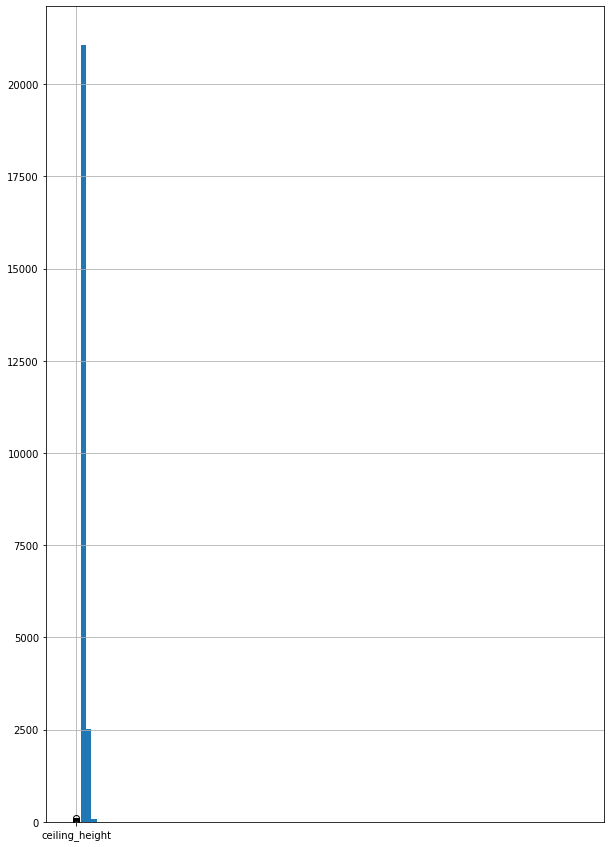

In [23]:
old_ceiling_height = data['ceiling_height'].count()
print(old_ceiling_height)
data['ceiling_height'].hist(bins=100, range=(0,100), grid = True, figsize=(10,15))
data.boxplot(column=['ceiling_height']) 



<AxesSubplot:>

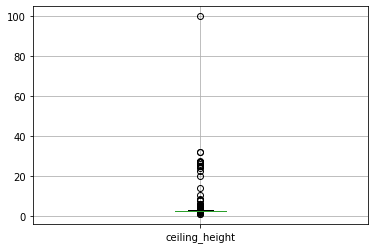

In [24]:
data.boxplot(column=['ceiling_height']) 


In [25]:
print(data['ceiling_height'].describe())

count    23699.000000
mean     2.724358    
std      0.988298    
min      1.000000    
25%      2.600000    
50%      2.650000    
75%      2.700000    
max      100.000000  
Name: ceiling_height, dtype: float64


По диаграммам видим наличие выбросов, в том числе высота потолка 100м

ограничим высоту потолков интервалом от 2.5 до 6 метров

In [26]:
max_ceiling_height=6

print (data.query('ceiling_height > @max_ceiling_height')['ceiling_height'].count())


29


In [27]:
min_ceiling_height=2.5
data['too_litle_ceiling_height'] = data.query('ceiling_height < @min_ceiling_height')['ceiling_height']
print (data['too_litle_ceiling_height'].count())

c=(data['too_litle_ceiling_height'].count()/23699).round(4)

print ("{:.2%}".format(c))


73
0.31%


количество квартир с высотой потолка менее 2,5 метра составляет 0,31%

In [28]:
max_ceiling_height=6
data['too_big_ceiling_height'] = data.query('ceiling_height > @max_ceiling_height')['ceiling_height']
print (data['too_big_ceiling_height'].count())

c=(data['too_big_ceiling_height'].count()/23699).round(4)

print ("{:.2%}".format(c))

29
0.12%


количество квартир с высотой потолка более 6 метров составляет 1,28%

In [29]:
data['norm_ceiling_height'] = data.query('@min_ceiling_height <= ceiling_height <= @max_ceiling_height')['ceiling_height']
data['norm_ceiling_height']=data['norm_ceiling_height'].astype('float64')

print(data['norm_ceiling_height'].head(20))
print(data['norm_ceiling_height'].describe())
data.info()

0     2.70
1     2.65
2     2.65
3     2.65
4     3.03
5     2.65
6     2.65
7     2.65
8     2.65
9     2.50
10    2.67
11    2.65
12    2.65
13    2.56
14    2.65
15    2.65
16    3.05
17    2.65
18    2.50
19    2.75
Name: norm_ceiling_height, dtype: float64
count    23597.000000
mean     2.697984    
std      0.220478    
min      2.500000    
25%      2.600000    
50%      2.650000    
75%      2.700000    
max      6.000000    
Name: norm_ceiling_height, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_images              23699 non-null  int64  
 1   last_price                23699 non-null  float64
 2   total_area                23699 non-null  float64
 3   first_day_exposition      23699 non-null  object 
 4   rooms                     23699 non-null  int64  
 5   ceiling_height       

<AxesSubplot:>

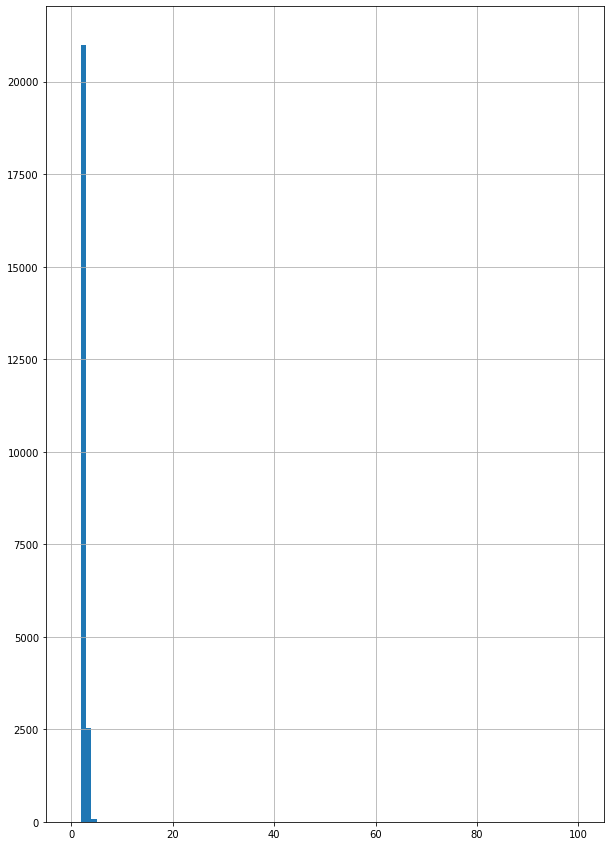

In [30]:
data['norm_ceiling_height'].hist(bins=100, range=(0,100), grid = True, figsize=(10,15))

наблюдается большой пик в районе среднего значения.

<AxesSubplot:>

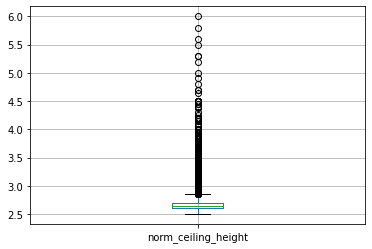

In [31]:
data.boxplot(column=['norm_ceiling_height']) 

In [32]:
print(data['norm_ceiling_height'].describe())

count    23597.000000
mean     2.697984    
std      0.220478    
min      2.500000    
25%      2.600000    
50%      2.650000    
75%      2.700000    
max      6.000000    
Name: norm_ceiling_height, dtype: float64


In [33]:
print((old_ceiling_height-data['norm_ceiling_height'].count())/old_ceiling_height)

0.004303979070846871


 Удаленные значения для ceiling_height составляют 0,43%

In [34]:

data = data.dropna(subset=['norm_ceiling_height'])
print(data['norm_ceiling_height'].describe())
print(data['ceiling_height'].describe())

print(data['ceiling_height'].head(20))


count    23597.000000
mean     2.697984    
std      0.220478    
min      2.500000    
25%      2.600000    
50%      2.650000    
75%      2.700000    
max      6.000000    
Name: norm_ceiling_height, dtype: float64
count    23597.000000
mean     2.697984    
std      0.220478    
min      2.500000    
25%      2.600000    
50%      2.650000    
75%      2.700000    
max      6.000000    
Name: ceiling_height, dtype: float64
0     2.70
1     2.65
2     2.65
3     2.65
4     3.03
5     2.65
6     2.65
7     2.65
8     2.65
9     2.50
10    2.67
11    2.65
12    2.65
13    2.56
14    2.65
15    2.65
16    3.05
17    2.65
18    2.50
19    2.75
Name: ceiling_height, dtype: float64


In [35]:
data.info()
print(data.head(20))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23597 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_images              23597 non-null  int64  
 1   last_price                23597 non-null  float64
 2   total_area                23597 non-null  float64
 3   first_day_exposition      23597 non-null  object 
 4   rooms                     23597 non-null  int64  
 5   ceiling_height            23597 non-null  float64
 6   floors_total              23597 non-null  object 
 7   living_area               21700 non-null  float64
 8   floor                     23597 non-null  int64  
 9   is_apartment              23597 non-null  bool   
 10  studio                    23597 non-null  bool   
 11  open_plan                 23597 non-null  bool   
 12  kitchen_area              23597 non-null  float64
 13  balcony                   23597 non-null  float64
 14  locali

<AxesSubplot:>

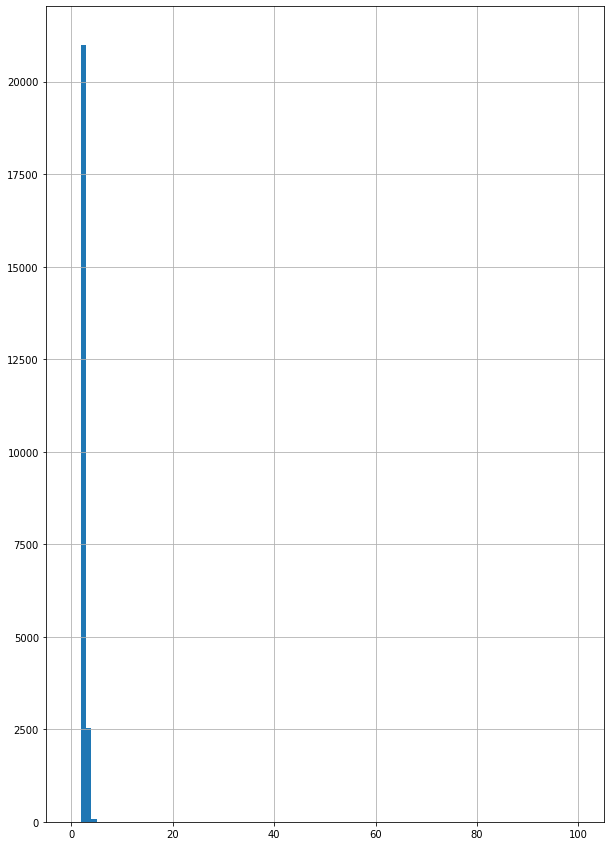

In [36]:
data['norm_ceiling_height'].hist(bins=100, range=(0,100), grid = True, figsize=(10,15))

наблюдается большой пик в районе среднего значения.

<AxesSubplot:>

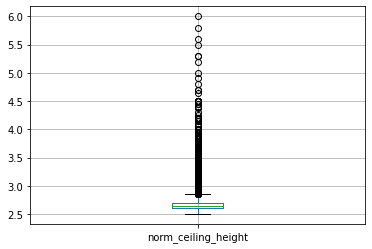

In [37]:
data.boxplot(column=['norm_ceiling_height']) 

In [38]:
print(data['ceiling_height'].describe())

count    23597.000000
mean     2.697984    
std      0.220478    
min      2.500000    
25%      2.600000    
50%      2.650000    
75%      2.700000    
max      6.000000    
Name: ceiling_height, dtype: float64


In [39]:
print(data['norm_ceiling_height'].describe())

count    23597.000000
mean     2.697984    
std      0.220478    
min      2.500000    
25%      2.600000    
50%      2.650000    
75%      2.700000    
max      6.000000    
Name: norm_ceiling_height, dtype: float64


In [40]:
print((old_ceiling_height-data['norm_ceiling_height'].count())/old_ceiling_height)

0.004303979070846871


 Удаленные значения для ceiling_height составляют 0,43%

Исследование last_price

In [41]:
data.info()
print(data['last_price'].head(20))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23597 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_images              23597 non-null  int64  
 1   last_price                23597 non-null  float64
 2   total_area                23597 non-null  float64
 3   first_day_exposition      23597 non-null  object 
 4   rooms                     23597 non-null  int64  
 5   ceiling_height            23597 non-null  float64
 6   floors_total              23597 non-null  object 
 7   living_area               21700 non-null  float64
 8   floor                     23597 non-null  int64  
 9   is_apartment              23597 non-null  bool   
 10  studio                    23597 non-null  bool   
 11  open_plan                 23597 non-null  bool   
 12  kitchen_area              23597 non-null  float64
 13  balcony                   23597 non-null  float64
 14  locali

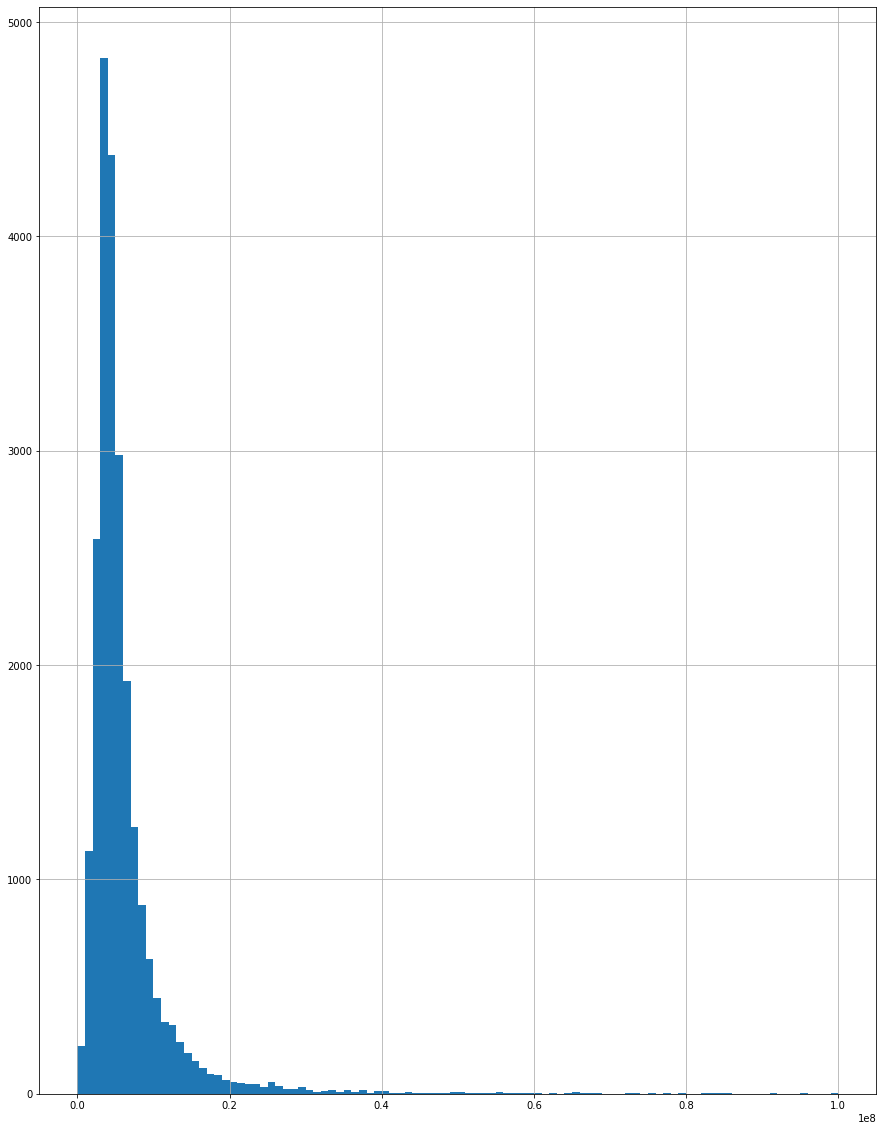

count    2.359700e+04
mean     6.552373e+06
std      1.090821e+07
min      1.219000e+04
25%      3.430000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


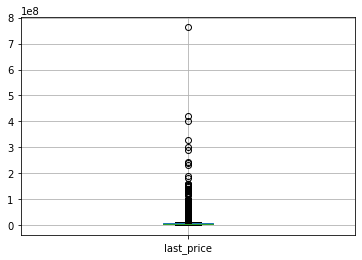

In [42]:

data.dtypes
data['last_price'].hist(bins=100, range=(0,100000000), grid = True, figsize=(15,20))
plt.show()

data.boxplot(column=['last_price']) 

print(data['last_price'].describe())

Есть несколько больших значений last_price, которые определим как выбросы

In [43]:
max_last_price=400000000

print (data.query('last_price > @max_last_price')['last_price'].count())

3


In [44]:

data['too_big_last_price'] = data.query('last_price > @max_last_price')['last_price']

print (data['too_big_last_price'].count())
print (data['last_price'].count())
c=(data['too_big_last_price'].count()/23699).round(4)

print ("{:.2%}".format(c))

3
23597
0.01%


Удаленные значения для last_price > 200000000 составят 0,01%.

count    2.359400e+04
mean     6.486057e+06
std      8.994235e+06
min      1.219000e+04
25%      3.430000e+06
50%      4.650000e+06
75%      6.800000e+06
max      3.300000e+08
Name: norm_last_price, dtype: float64


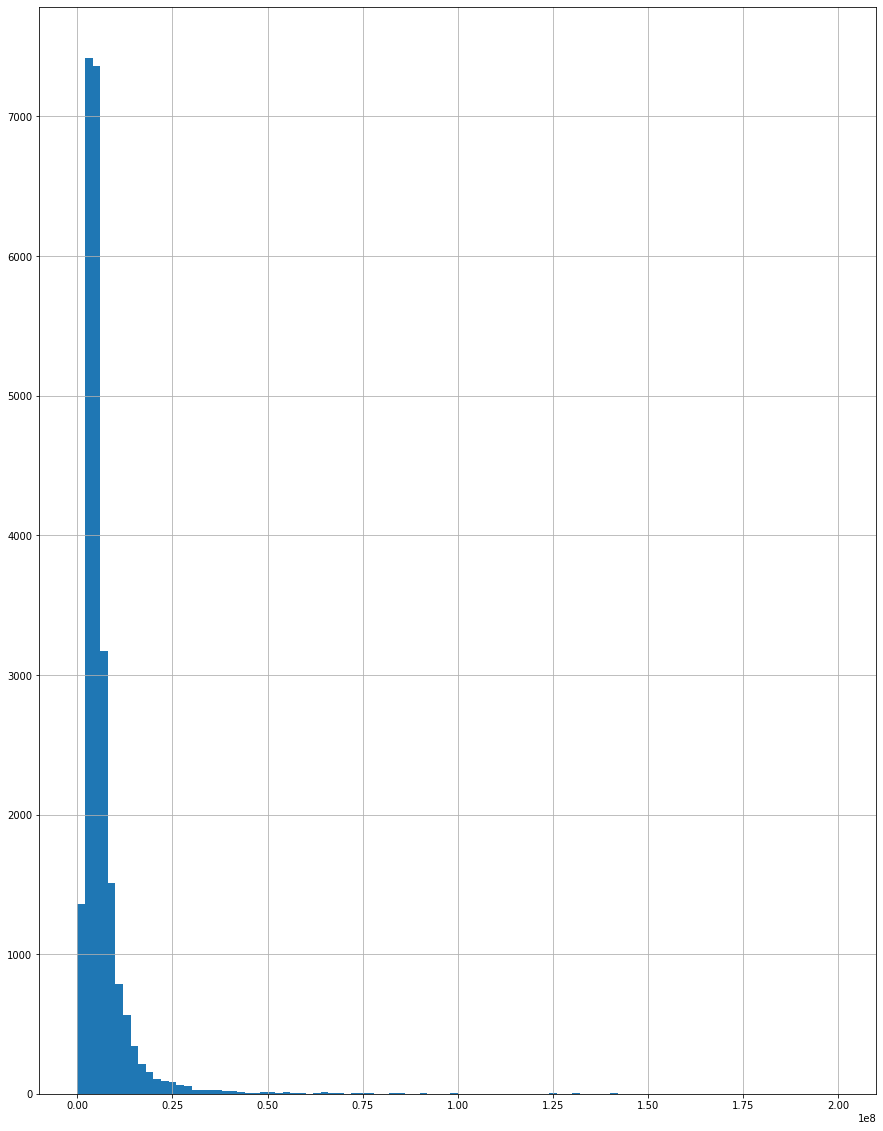

<AxesSubplot:>

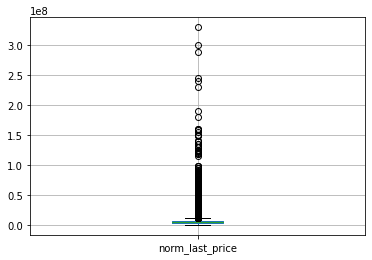

In [45]:
data['norm_last_price'] = data.query('last_price <= @max_last_price')['last_price']
data = data.dropna(subset=['norm_last_price'])

print(data['norm_last_price'].describe())

data['norm_last_price'].hist(bins=100, range=(0,200000000), grid = True, figsize=(15,20))
plt.show()

data.boxplot(column=['norm_last_price'])


Средняя нормальная цена составляет  6486057 руб,  медианная цена - 4650000 руб, максимальная - 330000000 руб.

Исследование rooms

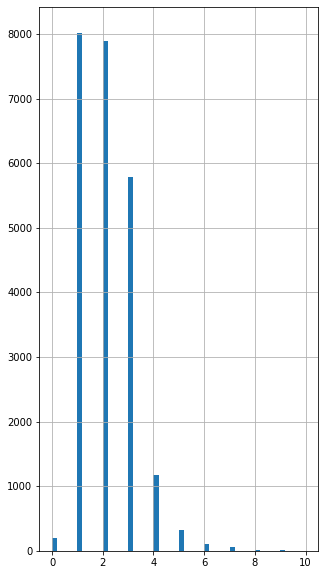

   total_images  last_price  total_area first_day_exposition  rooms  \
0  20            13000000.0  108.0       2019-03-07T00:00:00  3       
1  7             3350000.0   40.4        2018-12-04T00:00:00  1       
2  10            5196000.0   56.0        2015-08-20T00:00:00  2       
3  0             64900000.0  159.0       2015-07-24T00:00:00  3       
4  2             10000000.0  100.0       2018-06-19T00:00:00  2       

   ceiling_height floors_total  living_area  floor  is_apartment  studio  \
0  2.70            16.0         51.0         8      False         False    
1  2.65            11.0         18.6         1      False         False    
2  2.65            5.0          34.3         4      False         False    
3  2.65            14.0        NaN           9      False         False    
4  3.03            14.0         32.0         13     False         False    

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0  False      25.0          0.0      Санкт

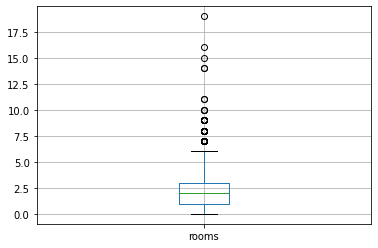

In [46]:

data['rooms'] = data['rooms'].astype('Int64')

data['rooms'].hist(bins=50, range=(0,10), grid = True, figsize=(5,10))
plt.show()
print(data.head())
data['rooms'] = data['rooms'].astype('Int64')
data.boxplot(column=['rooms']) 

print(data['rooms'].describe())

Предпочтение отдается 1, 2 и 3-х комнатным квартирам. Квартиры с нулевым количеством комнат, возможно, студии. 

Есть несколько больших значений и нулевых, которые определим как выбросы, диапазон количества квартир определим 1-6 комнат.

In [47]:
max_rooms=6
min_rooms=1

data['too_big_rooms'] = data.query('rooms > @max_rooms')['rooms']

print(data['rooms'].head())

print (data['too_big_rooms'].count())
print (data['rooms'].count())
c=(data['too_big_rooms'].count()/23699).round(4)

print ("{:.2%}".format(c))

0    3
1    1
2    2
3    3
4    2
Name: rooms, dtype: Int64
88
23594
0.37%


количество квартир с более чем 6 комнат составляет 0,37% от общего числа.

In [48]:

data['too_litle_rooms'] = data.query('rooms < @min_rooms')['rooms']
data['too_litle_rooms'] = data['too_litle_rooms'].astype('Int64')
print(data['too_litle_rooms'].count())

c=(data['too_litle_rooms'].count()/23699).round(4)

print ("{:.2%}".format(c))

196
0.83%


количество квартир с нулевым числом комнат составляет 0,83%

Исследование rooms

23594
23310
count    23310.000000
mean     2.065337    
std      0.993770    
min      1.000000    
25%      1.000000    
50%      2.000000    
75%      3.000000    
max      6.000000    
Name: norm_rooms, dtype: float64


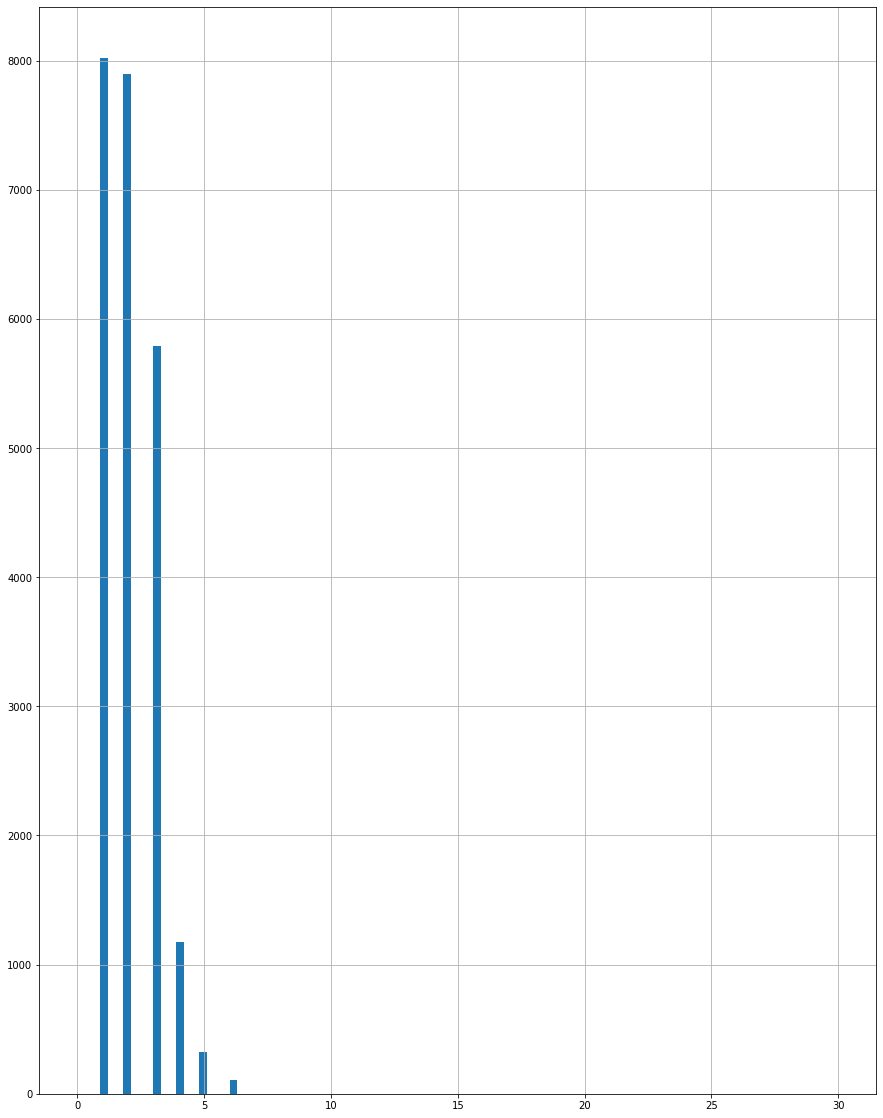

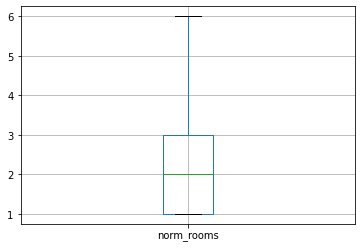

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23310 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_images              23310 non-null  int64  
 1   last_price                23310 non-null  float64
 2   total_area                23310 non-null  float64
 3   first_day_exposition      23310 non-null  object 
 4   rooms                     23310 non-null  Int64  
 5   ceiling_height            23310 non-null  float64
 6   floors_total              23310 non-null  object 
 7   living_area               21434 non-null  float64
 8   floor                     23310 non-null  int64  
 9   is_apartment              23310 non-null  bool   
 10  studio                    23310 non-null  bool   
 11  open_plan                 23310 non-null  bool   
 12  kitchen_area              23310 non-null  float64
 13  balcony                   23310 non-null  float64
 14  locali

In [49]:
old_rooms = data['rooms'].count()
print(old_rooms)
data['norm_rooms'] = data.query('@min_rooms <= rooms <= @max_rooms')['rooms']

data['norm_rooms'] = data['norm_rooms'].astype('Int64')

data = data.dropna(subset=['norm_rooms'])

print(data['norm_rooms'].count())

print(data['norm_rooms'].describe())

data['norm_rooms'].hist(bins=100, range=(0,30), grid = True, figsize=(15,20))
plt.show()

data.boxplot(column=['norm_rooms'])

plt.show()

data.info()

<AxesSubplot:>

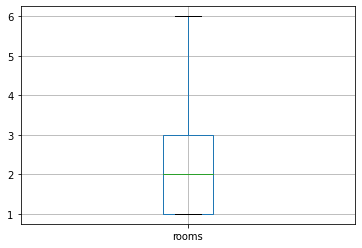

In [50]:
data.boxplot(column=['rooms']) 


In [51]:
print(data['rooms'].describe())

count    23310.000000
mean     2.065337    
std      0.993770    
min      1.000000    
25%      1.000000    
50%      2.000000    
75%      3.000000    
max      6.000000    
Name: rooms, dtype: float64


среднее и медианное количество комна  - по 2.

Определяем зависимость цены м2 от количества комнат.

0     3
1     1
2     2
3     3
4     2
5     1
6     1
7     2
8     1
9     3
10    1
11    2
12    2
13    2
14    1
15    1
16    3
17    1
18    1
19    3
Name: rooms, dtype: Int64


<AxesSubplot:xlabel='rooms'>

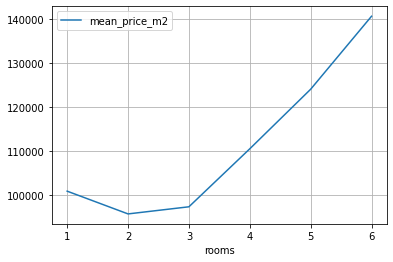

In [52]:
min_rooms = 1
max_rooms = 6
print(data['rooms'].head(20))
data['mean_price_m2'] = data['last_price']/data['total_area']

data.query('@min_rooms<= rooms <= @max_rooms').pivot_table(index='rooms', values='mean_price_m2', aggfunc='mean').plot(grid=True)

Цена м2 однокомнатных квартир дороже чем цена м2 двукомнатных и трехкомнатных, цены м2 растут от 2-х в прямой зависимости от количества комнат.   

Исследование общей площади

count    23310.000000
mean     59.798331   
std      31.909845   
min      12.000000   
25%      40.100000   
50%      52.000000   
75%      69.747500   
max      507.000000  
Name: total_area, dtype: float64


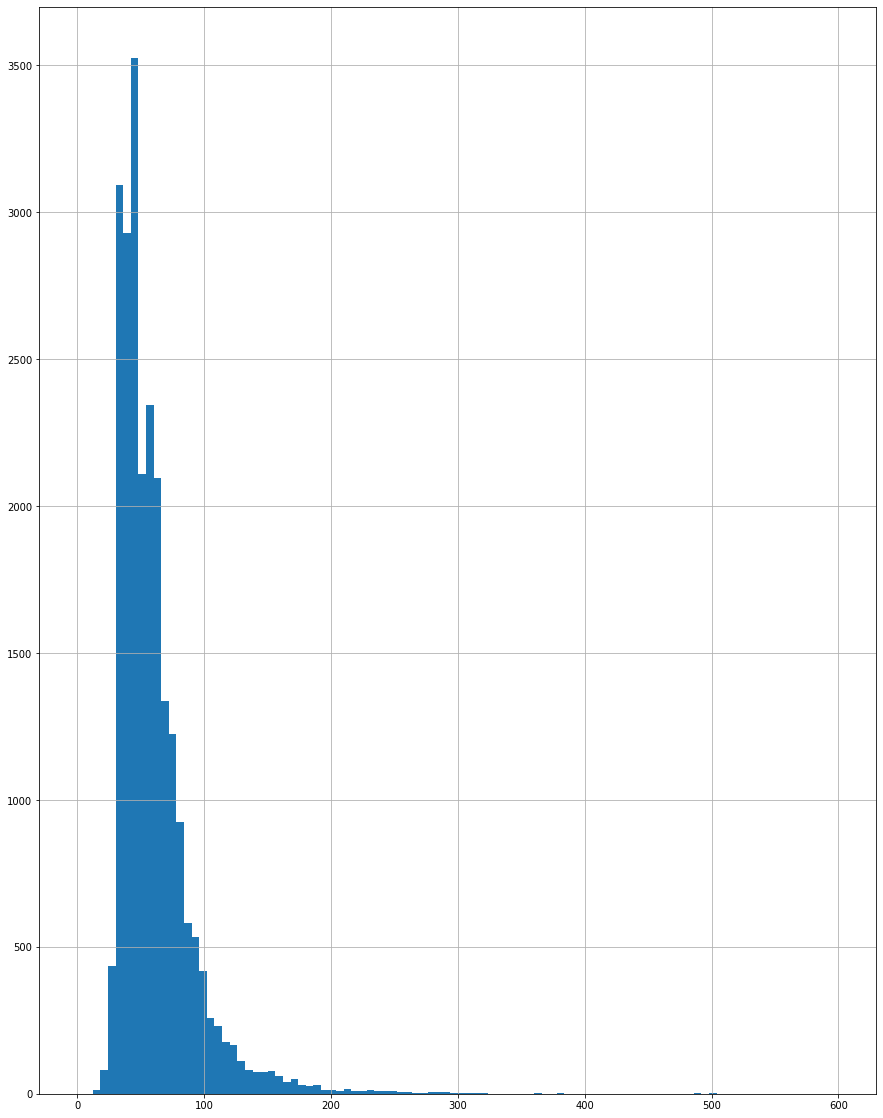

<AxesSubplot:>

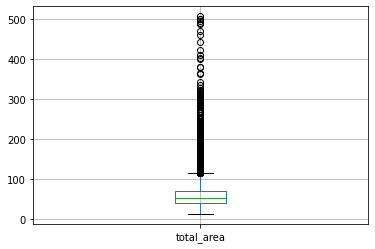

In [53]:
print(data['total_area'].describe())
data['total_area'].hist(bins=100, range=(0,600), grid = True, figsize=(15,20))
plt.show()
data.boxplot(column=['total_area'])

Ограничим исследование общей площадью в интервале 20-400 м2

23310
23279
count    23279.000000
mean     59.624818   
std      30.535709   
min      20.000000   
25%      40.100000   
50%      52.000000   
75%      69.700000   
max      399.000000  
Name: norm_total_area, dtype: float64


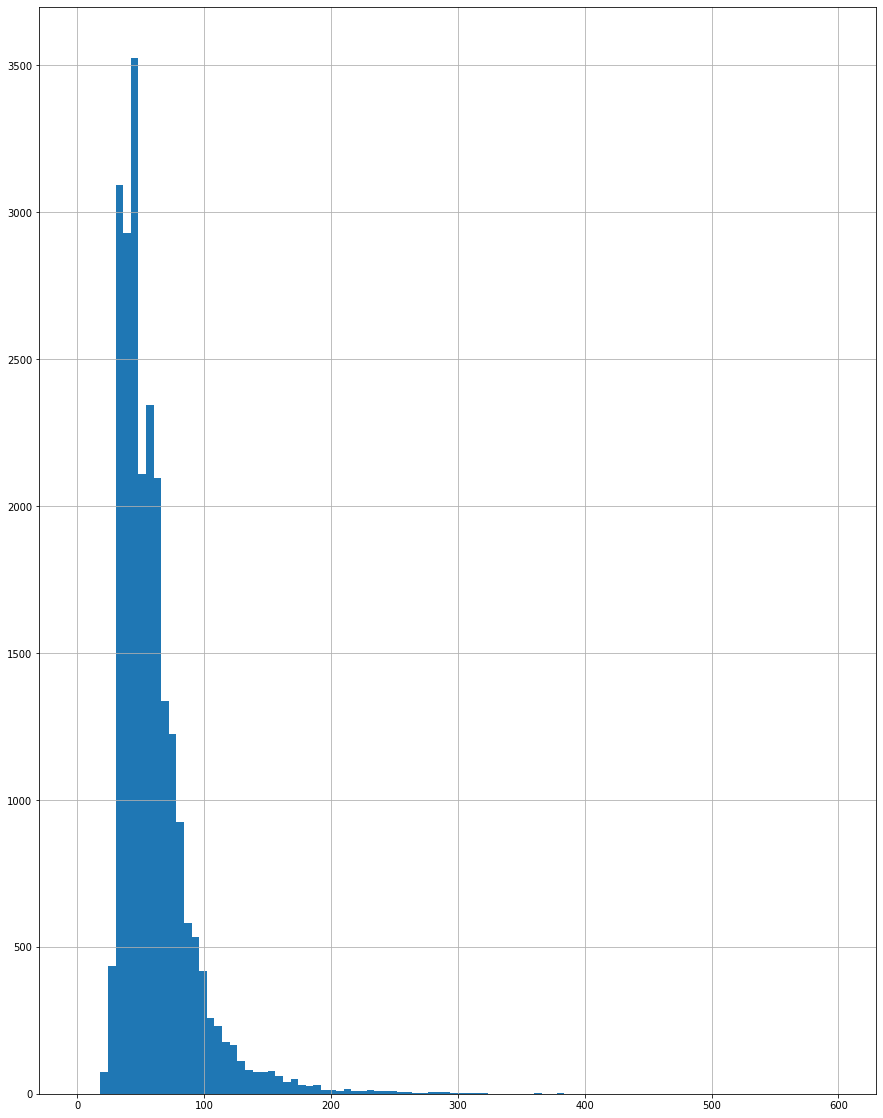

<AxesSubplot:>

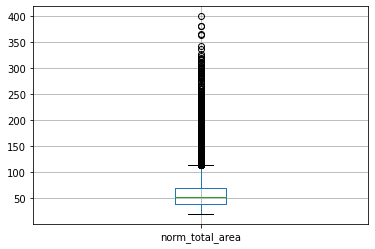

In [54]:
min_total_area = 20
max_total_area = 400

old_total_area = data['total_area'].count()
print(old_total_area)
data['norm_total_area'] = data.query('@min_total_area <= total_area <= @max_total_area')['total_area']

data = data.dropna(subset=['total_area'])

print(data['norm_total_area'].count())

print(data['norm_total_area'].describe())

data['norm_total_area'].hist(bins=100, range=(0,600), grid = True, figsize=(15,20))
plt.show()

data.boxplot(column=['norm_total_area'])

Медианное значение для общей площади составило 52 м2, средняя площадь -  59.62 м2 

Исследуем зависимость цены м2 и общей площади. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23310 entries, 0 to 23698
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_images              23310 non-null  int64  
 1   last_price                23310 non-null  float64
 2   total_area                23310 non-null  float64
 3   first_day_exposition      23310 non-null  object 
 4   rooms                     23310 non-null  Int64  
 5   ceiling_height            23310 non-null  float64
 6   floors_total              23310 non-null  object 
 7   living_area               21434 non-null  float64
 8   floor                     23310 non-null  int64  
 9   is_apartment              23310 non-null  bool   
 10  studio                    23310 non-null  bool   
 11  open_plan                 23310 non-null  bool   
 12  kitchen_area              23310 non-null  float64
 13  balcony                   23310 non-null  float64
 14  locali

<AxesSubplot:xlabel='total_area'>

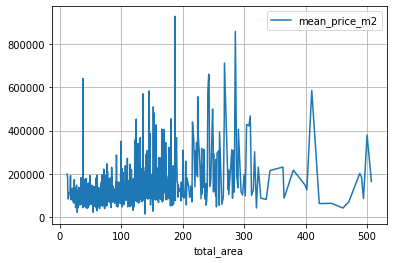

In [55]:
data['mean_price_m2'] = data['last_price']/data['total_area']
data.info()

data.pivot_table(index='total_area', values='mean_price_m2', aggfunc='mean').plot(grid=True)

Определенная зависимость между ценой м2 и общей площади квартир по графику наблюдается от 50 до 150 м2.

23310


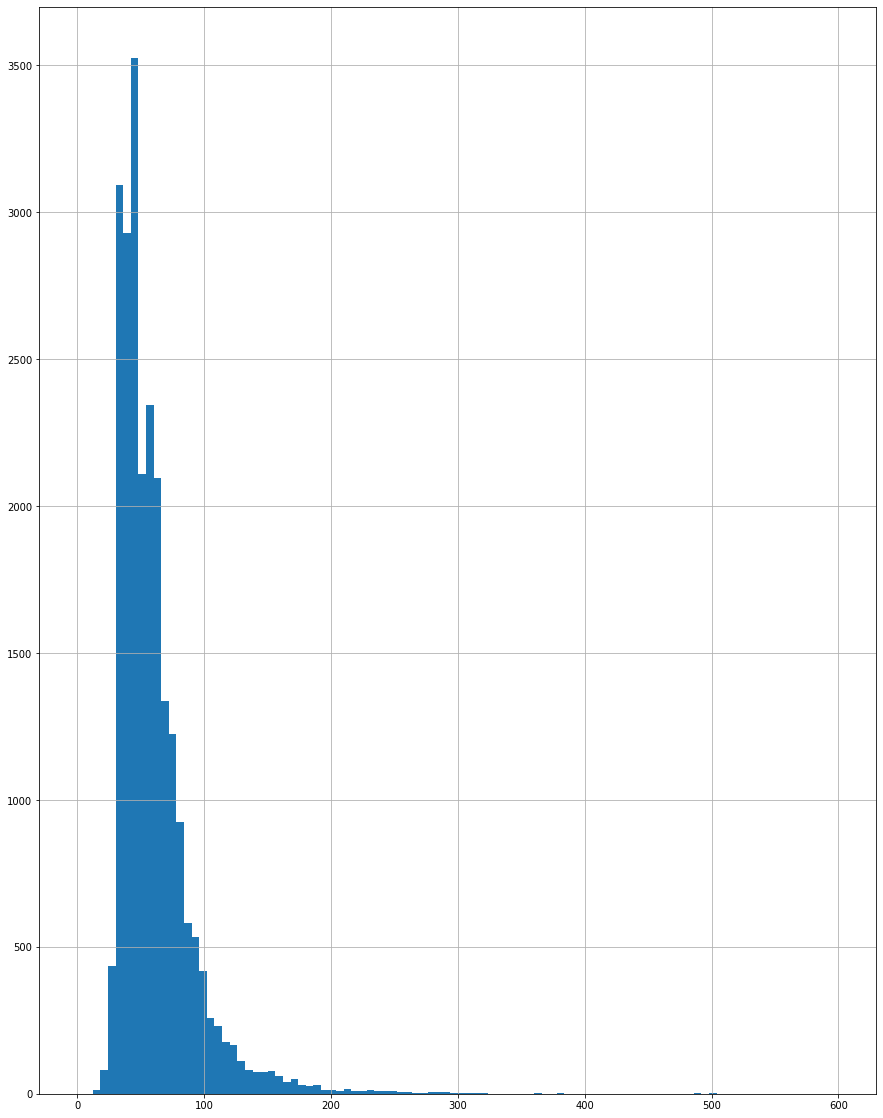

In [56]:
old_total_area = data['total_area'].count()
print(old_total_area)
data['total_area'].hist(bins=100, range=(0,600), grid = True, figsize=(15,20))
plt.show()


<AxesSubplot:>

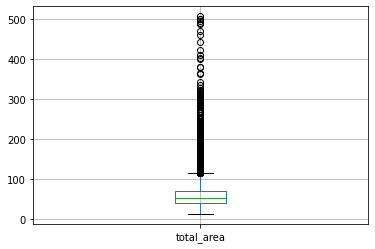

In [57]:
data.boxplot(column=['total_area']) 


In [58]:
max_total_area=400

print (data.query('total_area > @max_total_area')['total_area'].count())


12


In [59]:
min_total_area=20
data['too_litle_total_area'] = data.query('total_area < @min_total_area')['total_area']
print (data['too_litle_total_area'].count())

c=(data['too_litle_total_area'].count()/23699).round(4)

print ("{:.2%}".format(c))


19
0.08%


-- количество квартир с минимальной общей площадью менее 20 м2

In [60]:
max_total_area=400
data['too_big_total_area'] = data.query('total_area > @max_total_area')['total_area']
print (data['too_big_total_area'].count())

c=(data['too_big_total_area'].count()/23699).round(4)

print ("{:.2%}".format(c))

12
0.05%


-- количество квартир с максимальной общей площадью более 400 м2

In [61]:

data = data.dropna(subset=['norm_total_area'])
print(data['norm_total_area'].describe())
print(data['total_area'].describe())

print(data['total_area'].head(20))
data.info()

count    23279.000000
mean     59.624818   
std      30.535709   
min      20.000000   
25%      40.100000   
50%      52.000000   
75%      69.700000   
max      399.000000  
Name: norm_total_area, dtype: float64
count    23279.000000
mean     59.624818   
std      30.535709   
min      20.000000   
25%      40.100000   
50%      52.000000   
75%      69.700000   
max      399.000000  
Name: total_area, dtype: float64
0     108.00
1     40.40 
2     56.00 
3     159.00
4     100.00
5     30.40 
6     37.30 
7     71.60 
8     33.16 
9     61.00 
10    39.60 
11    44.00 
12    54.00 
13    42.80 
14    36.00 
15    39.00 
16    82.00 
17    36.00 
18    31.00 
19    121.00
Name: total_area, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23279 entries, 0 to 23698
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_images              23279 non-null  int64  
 1   last_

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23279 entries, 0 to 23698
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_images              23279 non-null  int64  
 1   last_price                23279 non-null  float64
 2   total_area                23279 non-null  float64
 3   first_day_exposition      23279 non-null  object 
 4   rooms                     23279 non-null  Int64  
 5   ceiling_height            23279 non-null  float64
 6   floors_total              23279 non-null  object 
 7   living_area               21416 non-null  float64
 8   floor                     23279 non-null  int64  
 9   is_apartment              23279 non-null  bool   
 10  studio                    23279 non-null  bool   
 11  open_plan                 23279 non-null  bool   
 12  kitchen_area              23279 non-null  float64
 13  balcony                   23279 non-null  float64
 14  locali

# 3 Новые столбцы

Цена одного квадратного метра

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23279 entries, 0 to 23698
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_images              23279 non-null  int64  
 1   last_price                23279 non-null  float64
 2   total_area                23279 non-null  float64
 3   first_day_exposition      23279 non-null  object 
 4   rooms                     23279 non-null  Int64  
 5   ceiling_height            23279 non-null  float64
 6   floors_total              23279 non-null  object 
 7   living_area               21416 non-null  float64
 8   floor                     23279 non-null  int64  
 9   is_apartment              23279 non-null  bool   
 10  studio                    23279 non-null  bool   
 11  open_plan                 23279 non-null  bool   
 12  kitchen_area              23279 non-null  float64
 13  balcony                   23279 non-null  float64
 14  locali

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23279 entries, 0 to 23698
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_images              23279 non-null  int64  
 1   last_price                23279 non-null  float64
 2   total_area                23279 non-null  float64
 3   first_day_exposition      23279 non-null  object 
 4   rooms                     23279 non-null  Int64  
 5   ceiling_height            23279 non-null  float64
 6   floors_total              23279 non-null  object 
 7   living_area               21416 non-null  float64
 8   floor                     23279 non-null  int64  
 9   is_apartment              23279 non-null  bool   
 10  studio                    23279 non-null  bool   
 11  open_plan                 23279 non-null  bool   
 12  kitchen_area              23279 non-null  float64
 13  balcony                   23279 non-null  float64
 14  locali

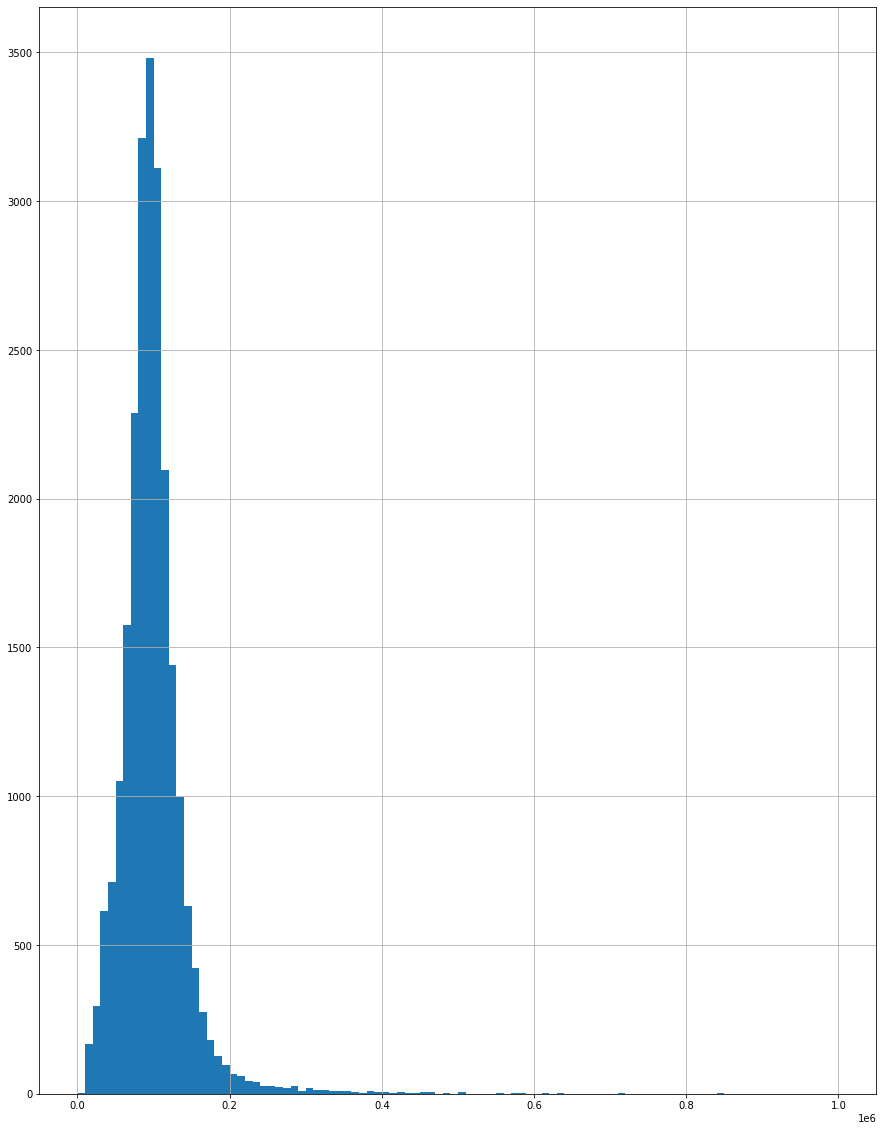

0     120370.37
1     82920.79 
2     92785.71 
3     408176.10
4     100000.00
5     95065.79 
6     99195.71 
7     110544.69
8     87454.76 
9     88524.59 
10    127525.25
11    75000.00 
12    72037.04 
13    82943.93 
14    122222.22
15    119230.77
16    81707.32 
17    116111.11
18    104838.71
19    117355.37
Name: price_m2, dtype: float64
count    2.327900e+04
mean     9.907263e+04
std      4.806520e+04
min      1.118300e+02
25%      7.651945e+04
50%      9.487179e+04
75%      1.140033e+05
max      1.736842e+06
Name: price_m2, dtype: float64


In [64]:
data['price_m2'] = (data['last_price']/data['total_area']).round(2)
data.info()

data['price_m2'].hist(bins=100, range=(0,1000000), grid = True, figsize=(15,20))
plt.show()
print(data['price_m2'].head(20))
print(data['price_m2'].describe())

Минимальная стоимость м2 составила 111,83 рублей - явный выброс, медианное значение - 96998 руб/м2, максимальная цена - 1 542 605 руб/м2. 

Год публикации объявления

In [65]:

print(pd.DatetimeIndex(data['first_day_exposition']).year)

data['first_day_exposition_year']=pd.DatetimeIndex(data['first_day_exposition']).year
print(data['first_day_exposition_year'].head(20))

print(data['first_day_exposition_year'].describe())

Int64Index([2019, 2018, 2015, 2015, 2018, 2018, 2017, 2019, 2018, 2017,
            ...
            2018, 2018, 2016, 2017, 2016, 2017, 2018, 2018, 2017, 2017],
           dtype='int64', name='first_day_exposition', length=23279)
0     2019
1     2018
2     2015
3     2015
4     2018
5     2018
6     2017
7     2019
8     2018
9     2017
10    2017
11    2018
12    2016
13    2017
14    2016
15    2017
16    2017
17    2016
18    2017
19    2019
Name: first_day_exposition_year, dtype: int64
count    23279.000000
mean     2017.365480 
std      1.042167    
min      2014.000000 
25%      2017.000000 
50%      2017.000000 
75%      2018.000000 
max      2019.000000 
Name: first_day_exposition_year, dtype: float64


In [66]:
data['mean_price_m2'] = data['last_price']/data['total_area']
print(data.head())


   total_images  last_price  total_area first_day_exposition  rooms  \
0  20            13000000.0  108.0       2019-03-07T00:00:00  3       
1  7             3350000.0   40.4        2018-12-04T00:00:00  1       
2  10            5196000.0   56.0        2015-08-20T00:00:00  2       
3  0             64900000.0  159.0       2015-07-24T00:00:00  3       
4  2             10000000.0  100.0       2018-06-19T00:00:00  2       

   ceiling_height floors_total  living_area  floor  is_apartment  studio  \
0  2.70            16.0         51.0         8      False         False    
1  2.65            11.0         18.6         1      False         False    
2  2.65            5.0          34.3         4      False         False    
3  2.65            14.0        NaN           9      False         False    
4  3.03            14.0         32.0         13     False         False    

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0  False      25.0          0.0      Санкт

Исследование зависимости цены м2 от года публикации

<AxesSubplot:xlabel='first_day_exposition_year'>

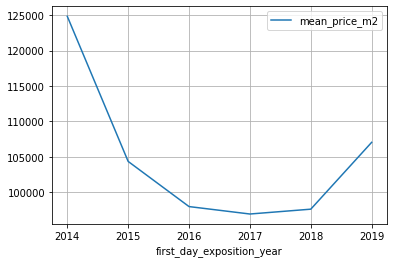

In [67]:
data.pivot_table(index='first_day_exposition_year', values='mean_price_m2', aggfunc='mean').plot(grid=True)

Цена м2 падала с 2014 по 2016 годы, затем относительная стабильность в 2016-2018 годах, с 2018 года наблюдается рост цен за м2. 

Месяц публикации объявления

In [68]:
print(pd.DatetimeIndex(data['first_day_exposition']).month)

data['first_day_exposition_month']=pd.DatetimeIndex(data['first_day_exposition']).month
print(data['first_day_exposition_month'].head(20))

Int64Index([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,
            ...
             2,  7, 10,  7,  8,  3,  1,  2,  3,  7],
           dtype='int64', name='first_day_exposition', length=23279)
0     3 
1     12
2     8 
3     7 
4     6 
5     9 
6     11
7     4 
8     5 
9     2 
10    11
11    8 
12    6 
13    7 
14    6 
15    11
16    11
17    9 
18    1 
19    1 
Name: first_day_exposition_month, dtype: int64


In [69]:
data['mean_price_m2'] = data['last_price']/data['total_area']
print(data.head())


   total_images  last_price  total_area first_day_exposition  rooms  \
0  20            13000000.0  108.0       2019-03-07T00:00:00  3       
1  7             3350000.0   40.4        2018-12-04T00:00:00  1       
2  10            5196000.0   56.0        2015-08-20T00:00:00  2       
3  0             64900000.0  159.0       2015-07-24T00:00:00  3       
4  2             10000000.0  100.0       2018-06-19T00:00:00  2       

   ceiling_height floors_total  living_area  floor  is_apartment  studio  \
0  2.70            16.0         51.0         8      False         False    
1  2.65            11.0         18.6         1      False         False    
2  2.65            5.0          34.3         4      False         False    
3  2.65            14.0        NaN           9      False         False    
4  3.03            14.0         32.0         13     False         False    

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0  False      25.0          0.0      Санкт

Исследование зависимости цены м2 от месяца публикации

<AxesSubplot:xlabel='first_day_exposition_month'>

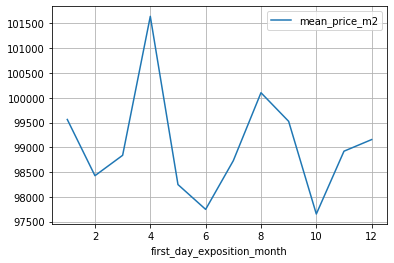

In [70]:
data.pivot_table(index='first_day_exposition_month', values='mean_price_m2', aggfunc='mean').plot(grid=True)

Пики цены м2 в 4-й, 9-й и 12-й месяцы года. Минимумы во 2-й, 6-й и 10-й месяцы года.

День публикации объявления

In [71]:

data['first_day_exposition_day']=pd.DatetimeIndex(data['first_day_exposition']).day
print(data['first_day_exposition_day'].head(20))

0     7 
1     4 
2     20
3     24
4     19
5     10
6     2 
7     18
8     23
9     26
10    16
11    27
12    30
13    1 
14    23
15    18
16    23
17    9 
18    27
19    9 
Name: first_day_exposition_day, dtype: int64


День недели публикации объявления

In [72]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', parse_dates=['first_day_exposition'])

data['day_of_week'] = data['first_day_exposition'].dt.dayofweek

print(data.head())


   total_images  last_price  total_area first_day_exposition  rooms  \
0  20            13000000.0  108.0      2019-03-07            3       
1  7             3350000.0   40.4       2018-12-04            1       
2  10            5196000.0   56.0       2015-08-20            2       
3  0             64900000.0  159.0      2015-07-24            3       
4  2             10000000.0  100.0      2018-06-19            2       

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0  2.70            16.0          51.0         8      NaN          False    
1 NaN              11.0          18.6         1      NaN          False    
2 NaN              5.0           34.3         4      NaN          False    
3 NaN              14.0         NaN           9      NaN          False    
4  3.03            14.0          32.0         13     NaN          False    

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0  False      25.0         NaN       Санкт

In [73]:
data['mean_price_m2'] = data['last_price']/data['total_area']
print(data.head())


   total_images  last_price  total_area first_day_exposition  rooms  \
0  20            13000000.0  108.0      2019-03-07            3       
1  7             3350000.0   40.4       2018-12-04            1       
2  10            5196000.0   56.0       2015-08-20            2       
3  0             64900000.0  159.0      2015-07-24            3       
4  2             10000000.0  100.0      2018-06-19            2       

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0  2.70            16.0          51.0         8      NaN          False    
1 NaN              11.0          18.6         1      NaN          False    
2 NaN              5.0           34.3         4      NaN          False    
3 NaN              14.0         NaN           9      NaN          False    
4  3.03            14.0          32.0         13     NaN          False    

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0  False      25.0         NaN       Санкт

Исследование зависимости цены м2 от дня недели публикации

<AxesSubplot:xlabel='day_of_week'>

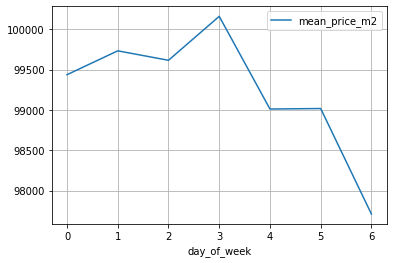

In [74]:
data.pivot_table(index='day_of_week', values='mean_price_m2', aggfunc='mean').plot(grid=True)

В первые четыре дня недели цена была выше чем в остальные. По средам средняя стоимость квартир была выше чем в остальные дни.

Тип этажа квартиры

0     другой   
1     первый   
2     другой   
3     другой   
4     другой   
5     другой   
6     другой   
7     другой   
8     другой   
9     другой   
10    другой   
11    другой   
12    последний
13    последний
14    первый   
15    другой   
16    первый   
17    другой   
18    другой   
19    другой   
Name: type_floor, dtype: object


<AxesSubplot:xlabel='type_floor'>

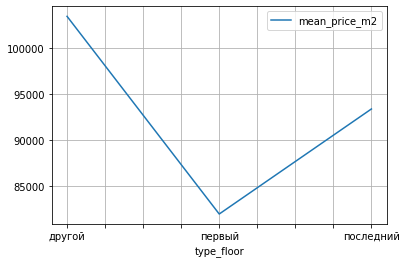

In [75]:
type_floor=[]
for i in range(len(data['floor'])):
    if data['floor'][i] == 1:
        type_floor.append("первый")
    else:
        if data['floor'][i] == data['floors_total'][i]:
            type_floor.append("последний")
        else:
            type_floor.append("другой")
data['type_floor'] = type_floor

print(data['type_floor'].head(20))

data['mean_price_m2'] = data['last_price']/data['total_area']

data.pivot_table(index='type_floor', values='mean_price_m2', aggfunc='mean').plot(grid=True)

По графику видно, цена первых этажей ниже последних, которые, в свою очередь ниже цены других этажей. 

Расстояние до центра в километрах

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 7 to 327
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   locality_name        28 non-null     object 
 1   cityCenters_nearest  28 non-null     float64
dtypes: float64(1), object(1)
memory usage: 672.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  float64       
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          14504 non-null  float64       
 6   floors_total            23613 non-null  float6

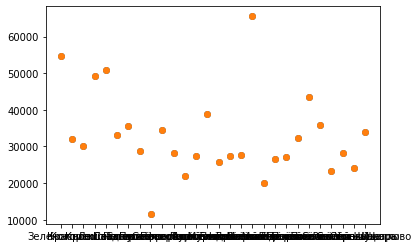

In [76]:
center_km = data.groupby(['locality_name'], as_index=False).agg({'cityCenters_nearest': 'mean'})
center_km = center_km[center_km['cityCenters_nearest'].notnull()]

center_km.info()

data['cityCenters_nearest_km']=(data['cityCenters_nearest']/1000).round()
data.info()
print(data['cityCenters_nearest_km'].head(50))
plt.scatter(x=center_km['locality_name'], y=center_km['cityCenters_nearest'])

plt.scatter(x=center_km['locality_name'], y=center_km['cityCenters_nearest'])

plt.show()


Из графика видно, что расстояние до центра от населенных пунктов в основном порядка 30 км

#   4 Проведите исследовательский анализ данных

In [77]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  float64       
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          14504 non-null  float64       
 6   floors_total            23613 non-null  float64       
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            2775 non-null   object        
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

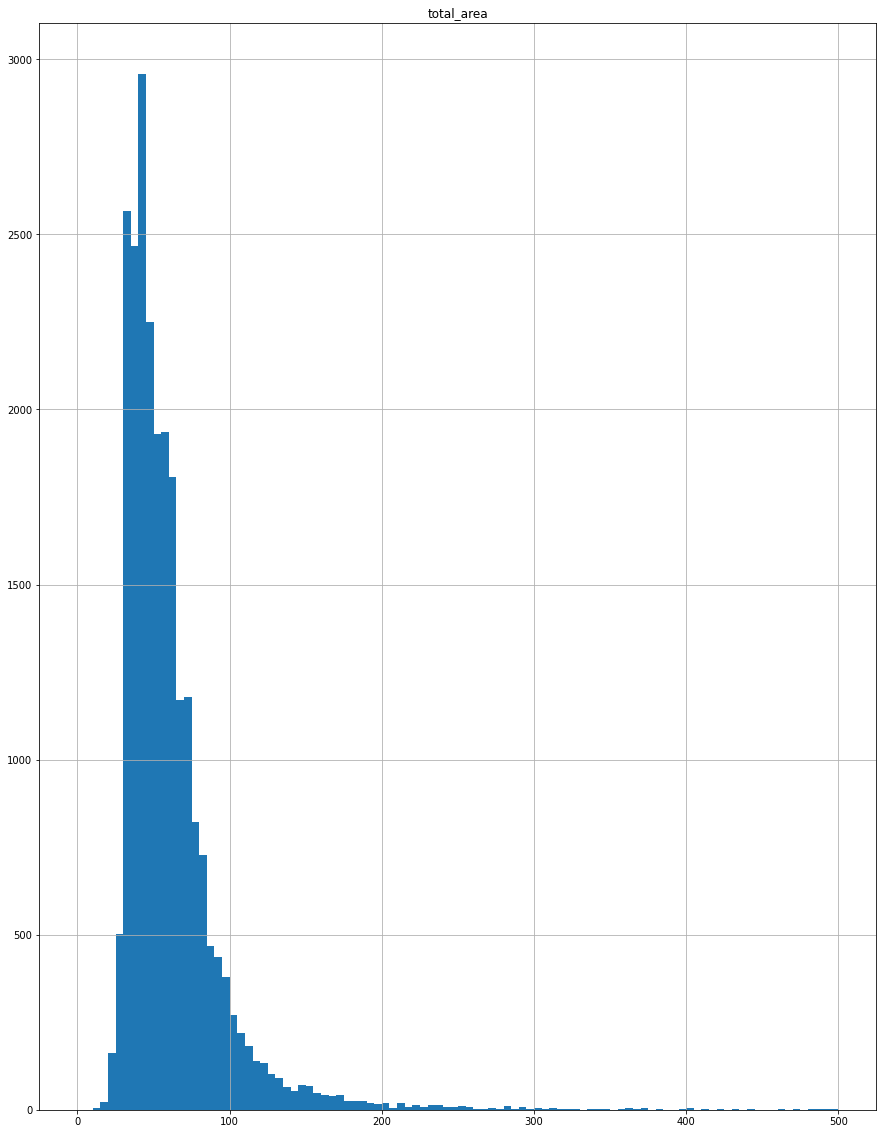

count    23699.000000
mean     60.348651   
std      35.654083   
min      12.000000   
25%      40.000000   
50%      52.000000   
75%      69.900000   
max      900.000000  
Name: total_area, dtype: float64

In [78]:

plt.title('total_area')
data['total_area'].hist(bins=100, range=(0,500), grid=True, figsize=(15,20))

plt.show()
#print(data['norm_total_area'])
data['total_area'].describe()
#data.columns

Средняя общая площадь квартир 60.35 , минимальная площадь 12 м2, медианная площадь 52 м2,  максимальная площадь 900 м2

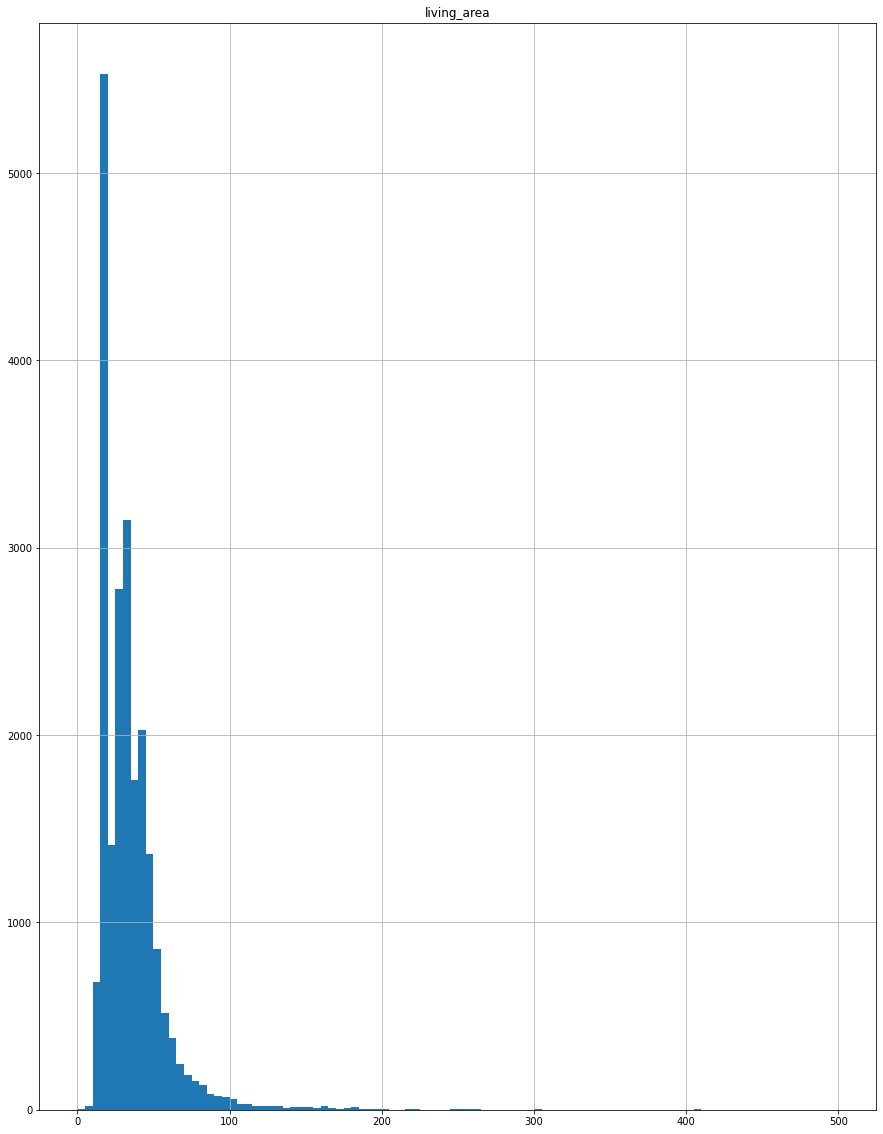

count    21796.000000
mean     34.457852   
std      22.030445   
min      2.000000    
25%      18.600000   
50%      30.000000   
75%      42.300000   
max      409.700000  
Name: living_area, dtype: float64

In [79]:

plt.title('living_area')
data['living_area'].hist(bins=100, range=(0,500), grid=True, figsize=(15,20))
plt.show()
data['living_area'].describe()
#data.columns

Медианное значение жилой площади составляет 30 м2

Зависимость между ценой м2 и размером жилой площади

<AxesSubplot:xlabel='living_area'>

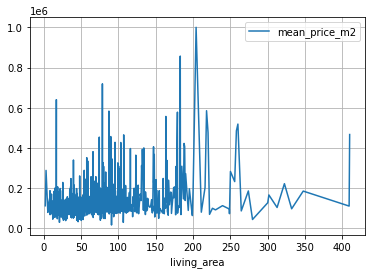

In [80]:
data['mean_price_m2'] = data['last_price']/data['total_area']

data.pivot_table(index='living_area', values='mean_price_m2', aggfunc='median').plot(grid=True)

Определенная прямая зависимость между ценой м2 и размером жилой площади наблюдается до 70 м2 (ориентировочно по графику)

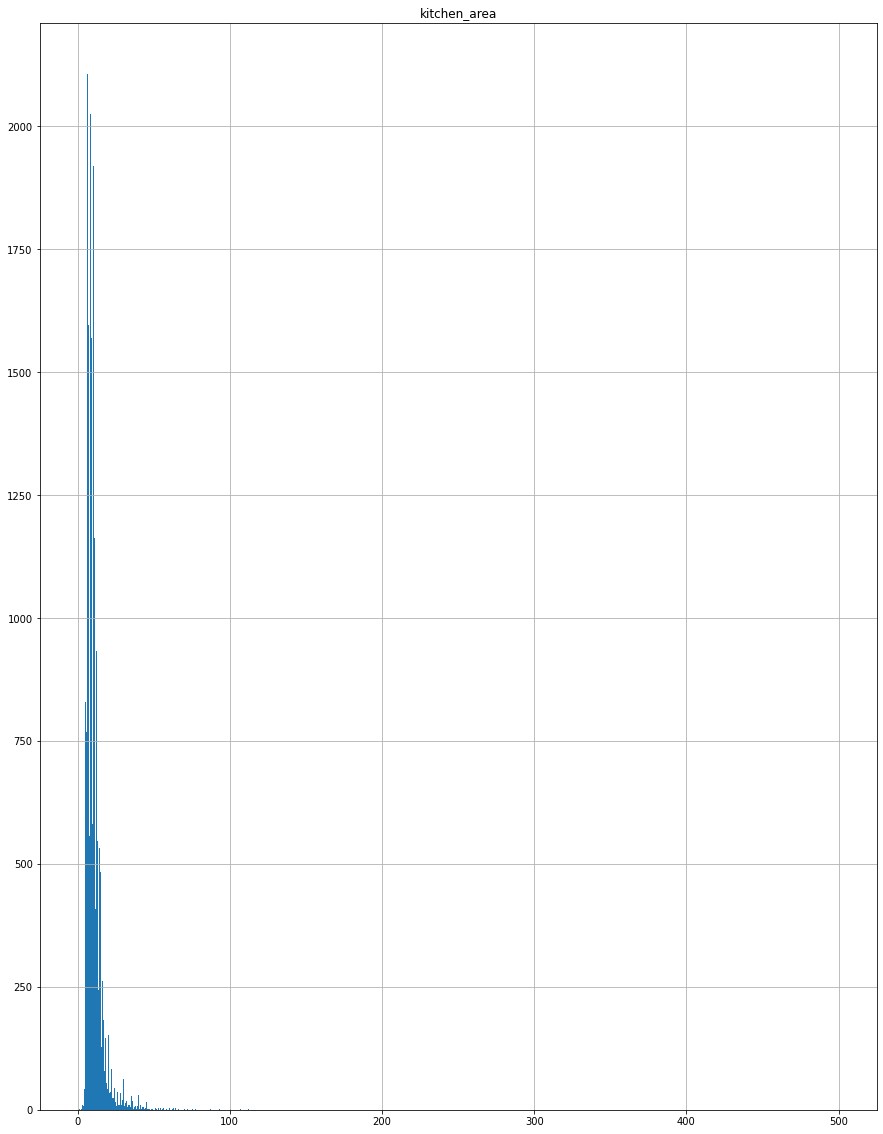

count    21421.000000
mean     10.569807   
std      5.905438    
min      1.300000    
25%      7.000000    
50%      9.100000    
75%      12.000000   
max      112.000000  
Name: kitchen_area, dtype: float64


In [81]:

plt.title('kitchen_area')
data['kitchen_area'].hist(bins=1000, range=(0,500), grid = True, figsize=(15,20))
plt.show()
print(data['kitchen_area'].describe())

Медианное значение площади кухни составило 9.1 м2

<AxesSubplot:xlabel='kitchen_area'>

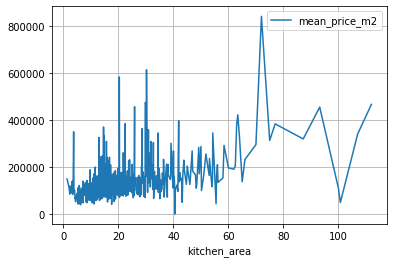

In [82]:
data['mean_price_m2'] = data['last_price']/data['total_area']

data.pivot_table(index='kitchen_area', values='mean_price_m2', aggfunc='mean').plot(grid=True)

Наблюдается небольшая прямая зависимость между ценой м2 и площадью кухни.

Последняя цена

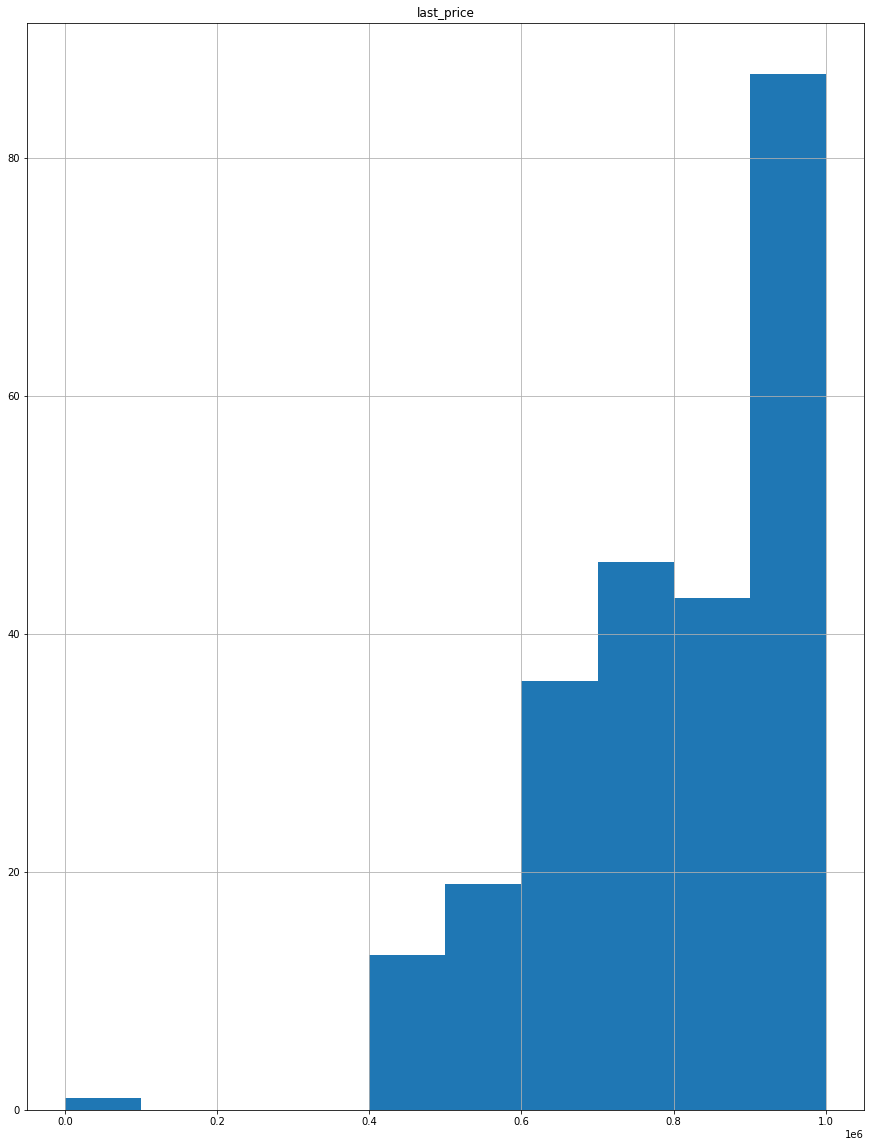

count    23699.000000
mean     6.541549    
std      10.887013   
min      0.012190    
25%      3.400000    
50%      4.650000    
75%      6.800000    
max      763.000000  
Name: last_price, dtype: float64

In [83]:

plt.title('last_price')
data['last_price'].hist(bins=10, range=(0,1000000), grid = True, figsize=(15,20))
plt.show()

(data['last_price']/1000000).describe()

Медианная стоимость состаила 4.65 млн.рублей, 75% квантиль - 6,8 млн. рублей

Количество комнат

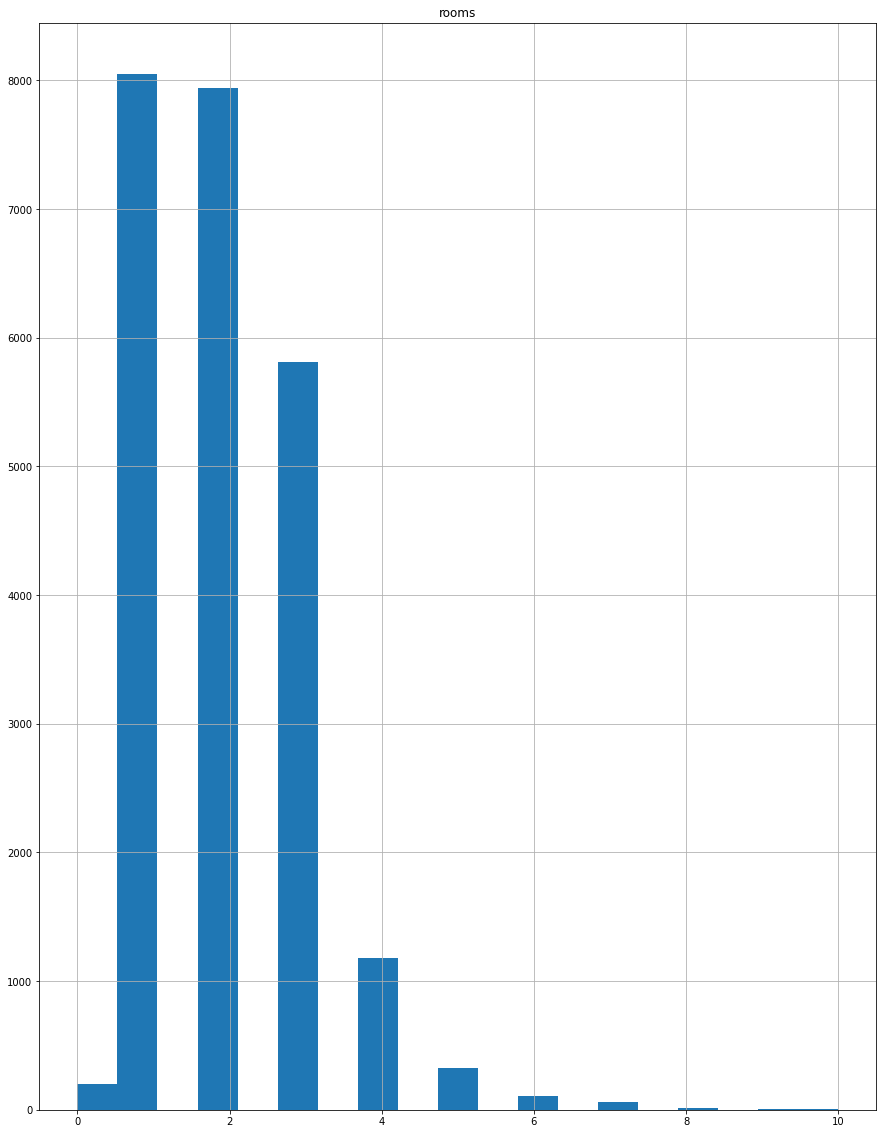

count    23699.000000
mean     2.070636    
std      1.078405    
min      0.000000    
25%      1.000000    
50%      2.000000    
75%      3.000000    
max      19.000000   
Name: rooms, dtype: float64


In [84]:
plt.title('rooms')
data['rooms'].hist(bins=19, range=(0,10), grid = True, figsize=(15,20))
plt.show()
print(data['rooms'].describe())

Медианное число комнат -2, 75% квантиль - 3 комнаты

0    2.70
1   NaN  
2   NaN  
3   NaN  
4    3.03
Name: ceiling_height, dtype: float64
count    14504.000000
mean     2.771499    
std      1.261056    
min      1.000000    
25%      2.520000    
50%      2.650000    
75%      2.800000    
max      100.000000  
Name: ceiling_height, dtype: float64


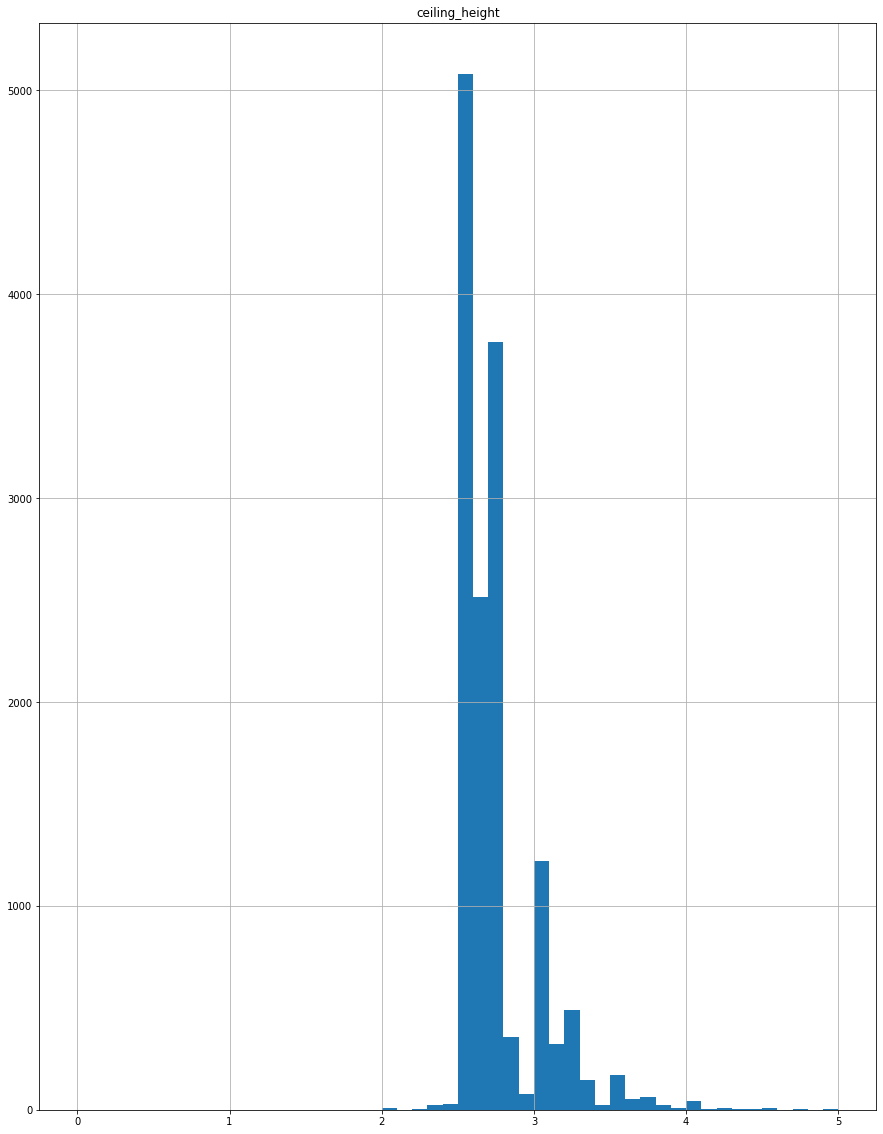

In [85]:
#print(data.head())
print(data['ceiling_height'].head())
plt.title('ceiling_height')
data['ceiling_height'].hist(bins=50, range=(0,5), grid = True, figsize=(15,20))
print(data['ceiling_height'].describe())

Медианное высота потолков сосавила  -2.65, 75% квантиль - 2,8 м

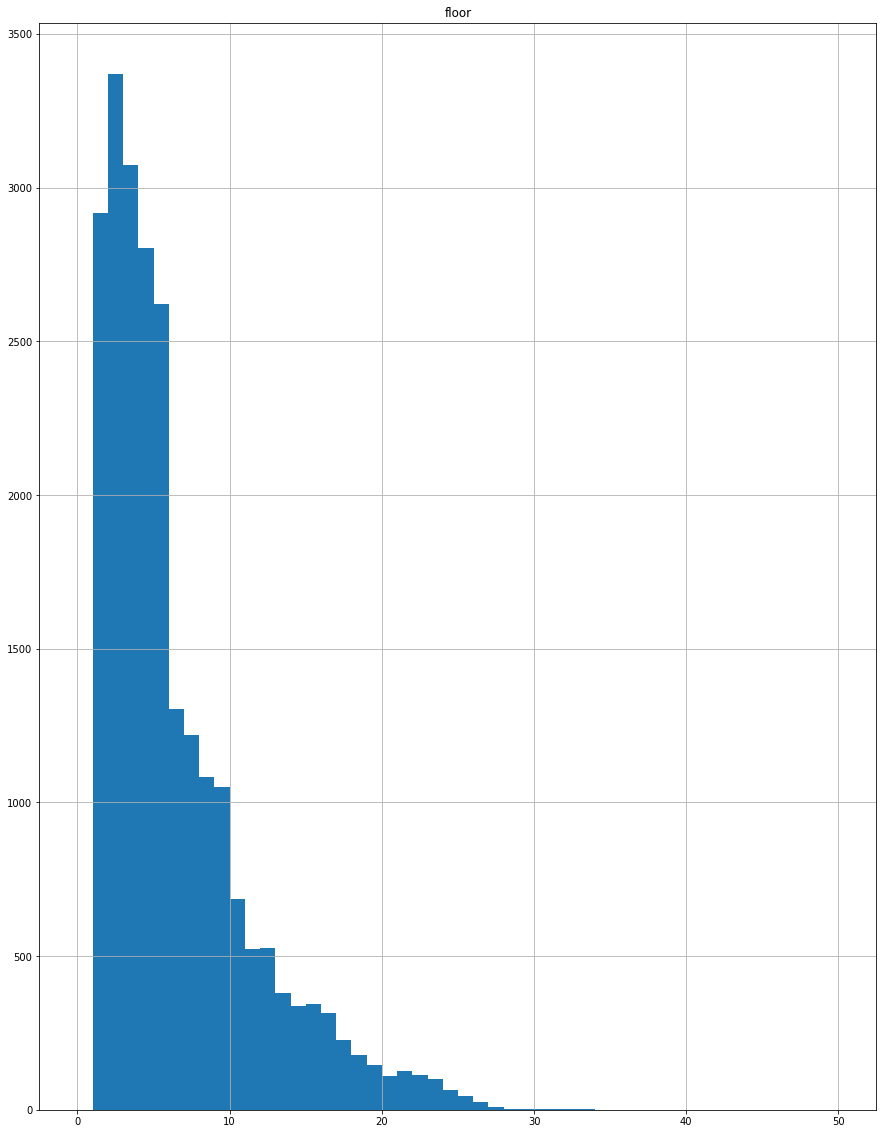

count    23699.000000
mean     5.892358    
std      4.885249    
min      1.000000    
25%      2.000000    
50%      4.000000    
75%      8.000000    
max      33.000000   
Name: floor, dtype: float64


In [86]:
plt.title('floor')
data['floor'].hist(bins=50, range=(0,50), grid = True, figsize=(15,20))
plt.show()
print(data['floor'].describe())

Медианный этаж - 4

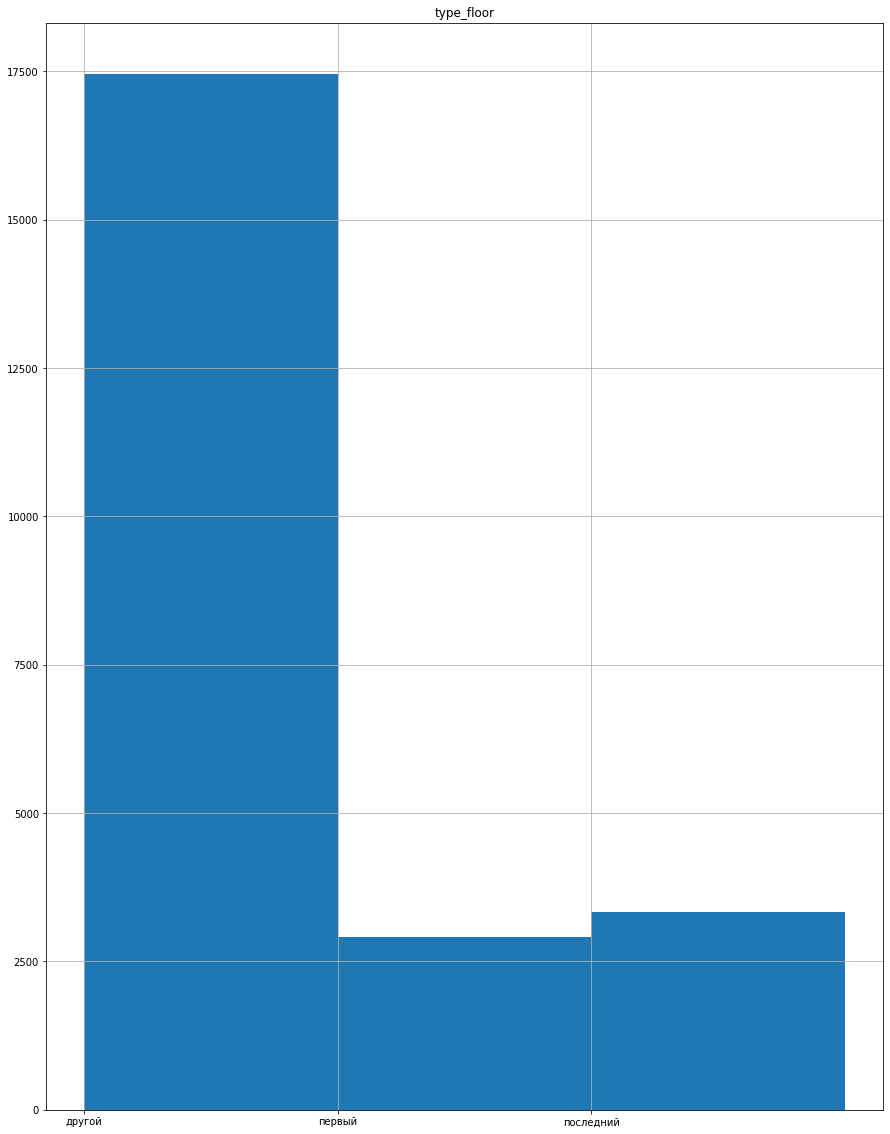

23699
type_floor
другой       17446
первый       2917 
последний    3336 
dtype: int64


In [87]:
plt.title('type_floor')
data['type_floor'].hist(bins=3, range=(0,3), grid = True, figsize=(15,20))
plt.show()
print(data['type_floor'].count())

print(data.pivot_table(index = ['type_floor'], aggfunc ='size'))

Первых этажей - 2917, других этажей - 17446 (наибольшее количество), последних этажей - 3336. Последних этажей продавалось больше чем первых. 

In [88]:
import matplotlib.pyplot as plt

#plt.title('floors_total')
#data['floors_total'].hist(bins=50, range=(0,50), grid = True, figsize=(15,20))
plt.show()
print(data['floors_total'].describe())

count    23613.000000
mean     10.673824   
std      6.597173    
min      1.000000    
25%      5.000000    
50%      9.000000    
75%      16.000000   
max      60.000000   
Name: floors_total, dtype: float64


Медианных этажей - 9, 75% квантиль - 16.

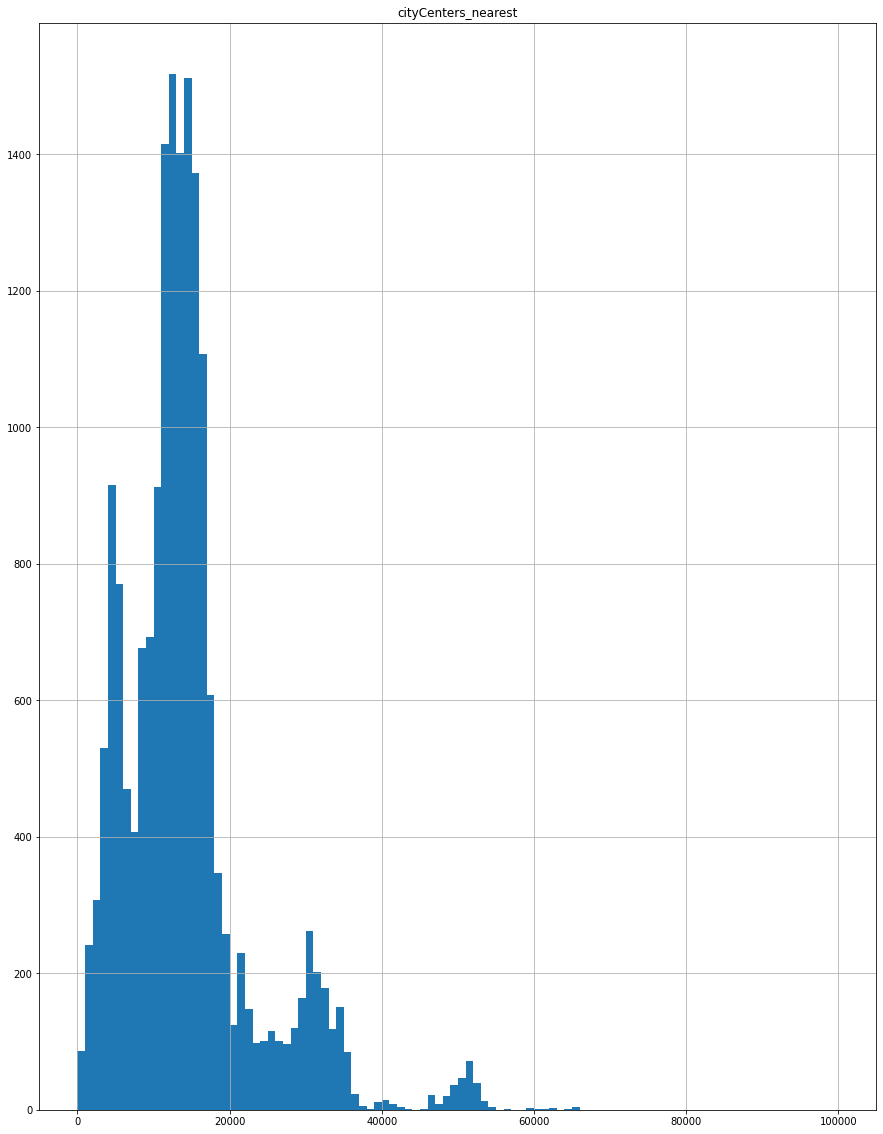

count    18180.000000
mean     14191.277833
std      8608.386210 
min      181.000000  
25%      9238.000000 
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


In [89]:
plt.title('cityCenters_nearest')
data['cityCenters_nearest'].hist(bins=100, range=(0,100000), grid = True, figsize=(15,20))
plt.show()
print(data['cityCenters_nearest'].describe())

медианное рсстояние до центра - 13 км

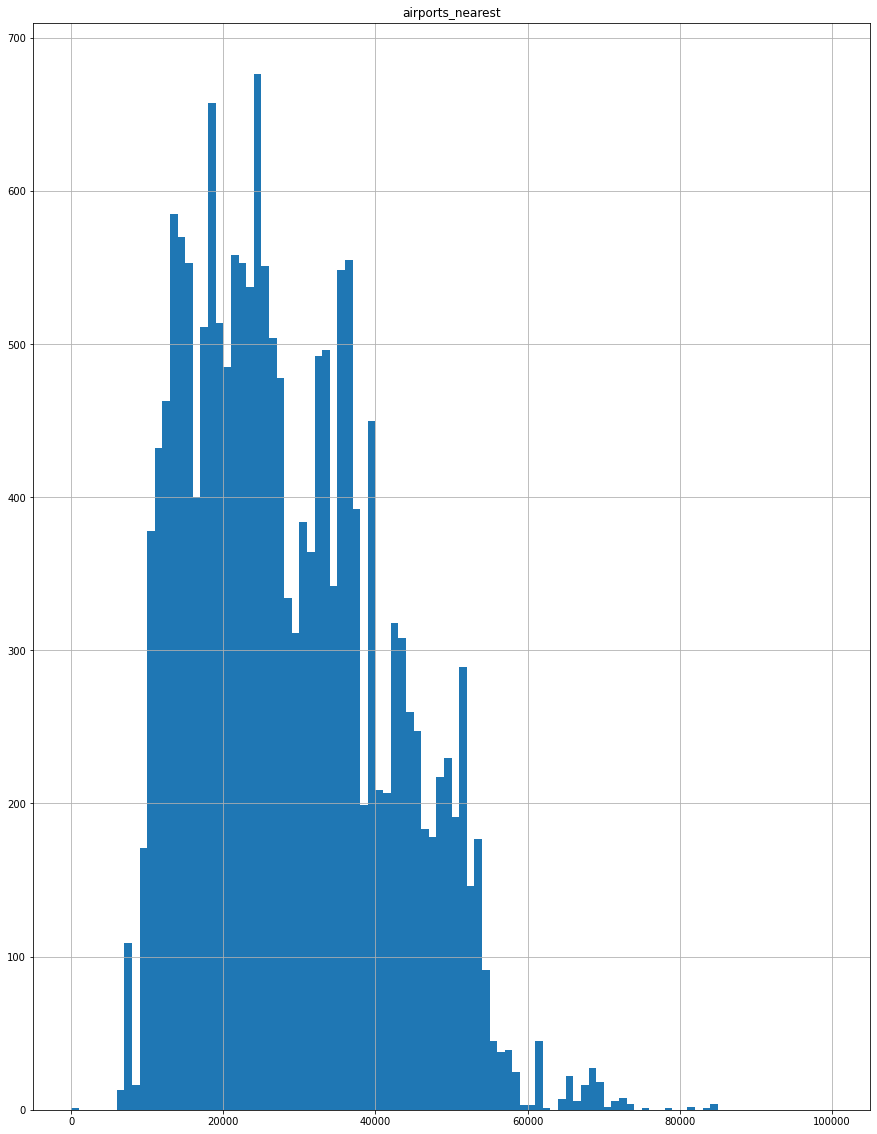

count    18157.000000
mean     28793.672193
std      12630.880622
min      0.000000    
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


In [90]:
plt.title('airports_nearest')
data['airports_nearest'].hist(bins=100, range=(0,100000), grid = True, figsize=(15,20))
plt.show()
print(data['airports_nearest'].describe())

медианное расстояние до аэропорта  26,7 км

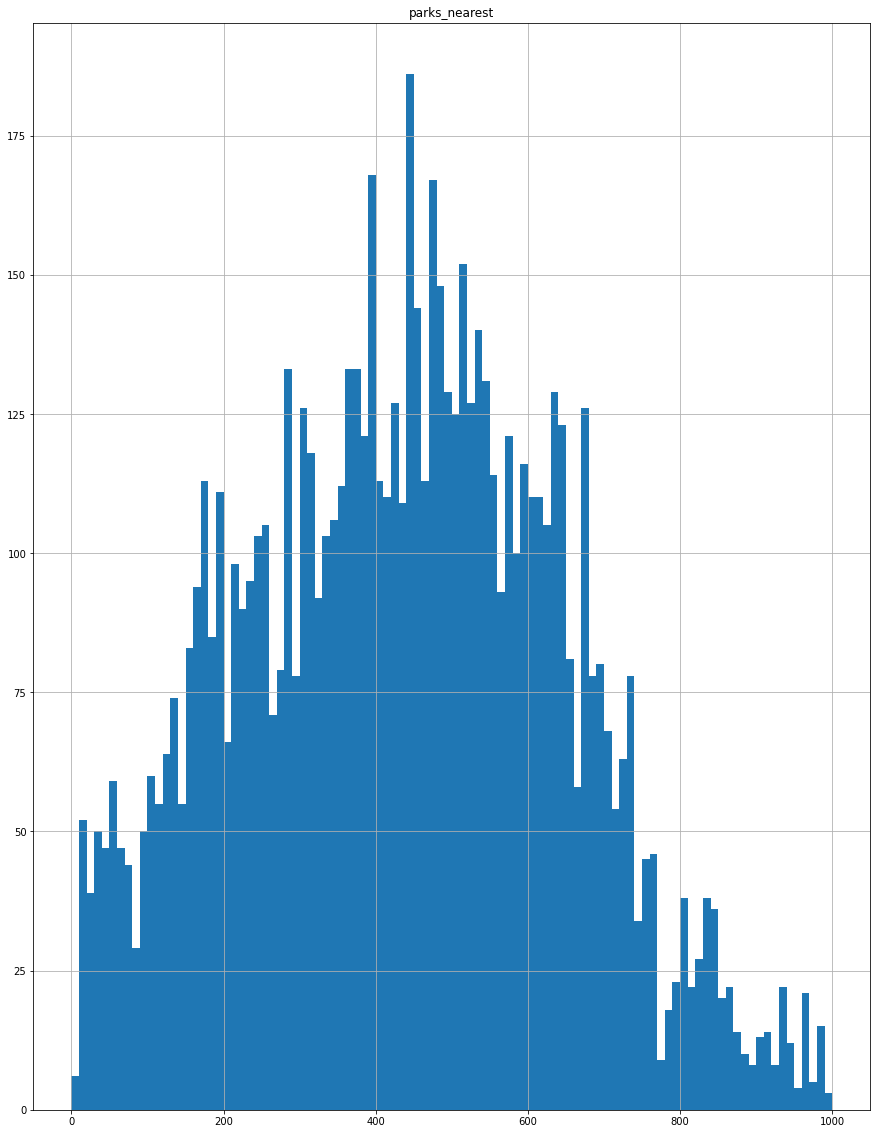

count    8079.000000
mean     490.804555 
std      342.317995 
min      1.000000   
25%      288.000000 
50%      455.000000 
75%      612.000000 
max      3190.000000
Name: parks_nearest, dtype: float64


In [91]:
plt.title('parks_nearest')
data['parks_nearest'].hist(bins=100, range=(0,1000), grid = True, figsize=(15,20))
plt.show()
print(data['parks_nearest'].describe())

Медианное расстояние до парка - 455м

0        3 
1        12
2        8 
3        7 
4        6 
5        9 
6        11
7        4 
8        5 
9        2 
10       11
11       8 
12       6 
13       7 
14       6 
15       11
16       11
17       9 
18       1 
19       1 
20       9 
21       3 
22       4 
23       10
24       10
25       10
26       4 
27       5 
28       12
29       4 
30       2 
31       10
32       5 
33       10
34       2 
35       6 
36       1 
37       10
38       3 
39       11
40       3 
41       5 
42       7 
43       1 
44       11
45       12
46       1 
47       10
48       10
49       11
50       11
51       10
52       9 
53       11
54       4 
55       3 
56       3 
57       10
58       7 
59       3 
60       1 
61       8 
62       9 
63       9 
64       11
65       3 
66       12
67       8 
68       8 
69       9 
70       9 
71       3 
72       12
73       3 
74       6 
75       2 
76       5 
77       3 
78       2 
79       12
80       2 
81       12
82       1 
83  

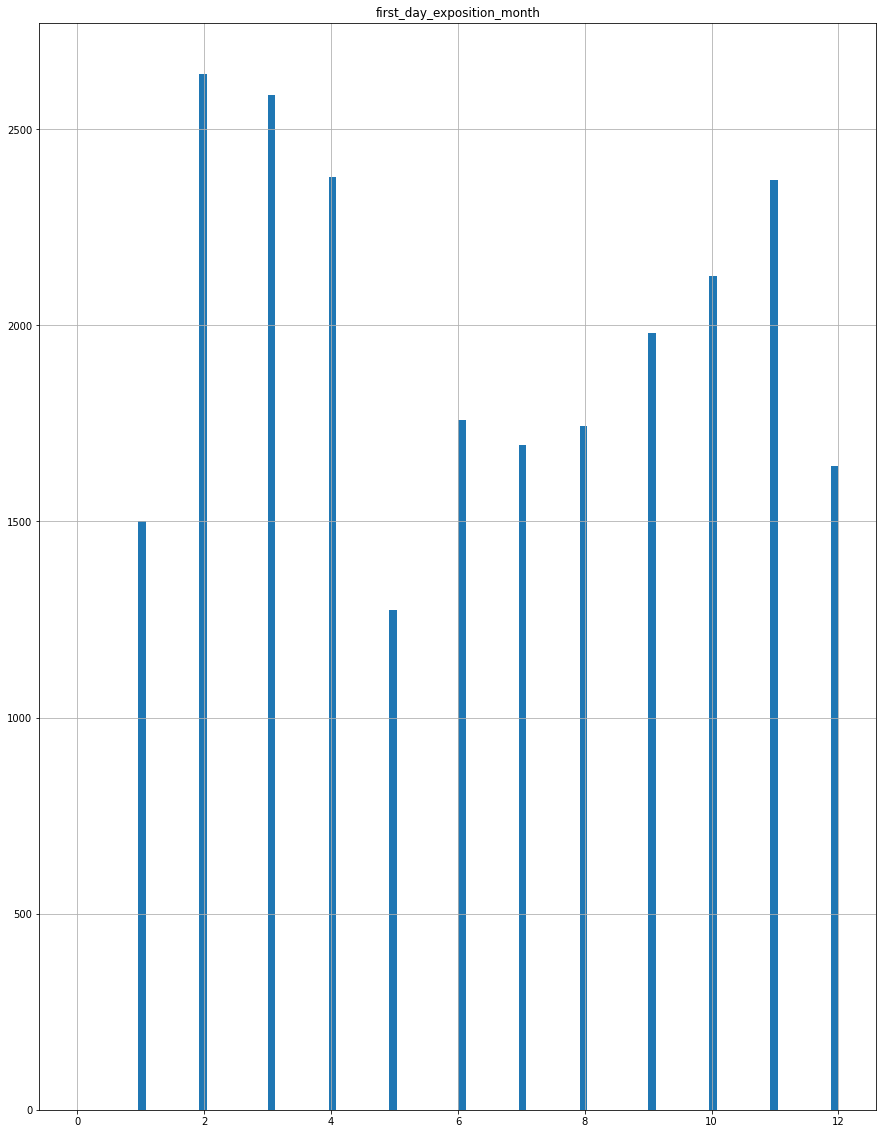

count    23699.000000
mean     6.400101    
std      3.491561    
min      1.000000    
25%      3.000000    
50%      6.000000    
75%      10.000000   
max      12.000000   
Name: first_day_exposition_month, dtype: float64


In [92]:
data['first_day_exposition_month']=pd.DatetimeIndex(data['first_day_exposition']).month
print(data['first_day_exposition_month'])

plt.title('first_day_exposition_month')
data['first_day_exposition_month'].hist(bins=100, range=(0,12), grid = True, figsize=(15,20))
plt.show()
print(data['first_day_exposition_month'].describe())

Медианный месяц продажи квартир - 6, 75% квантиль - 10-й месяц

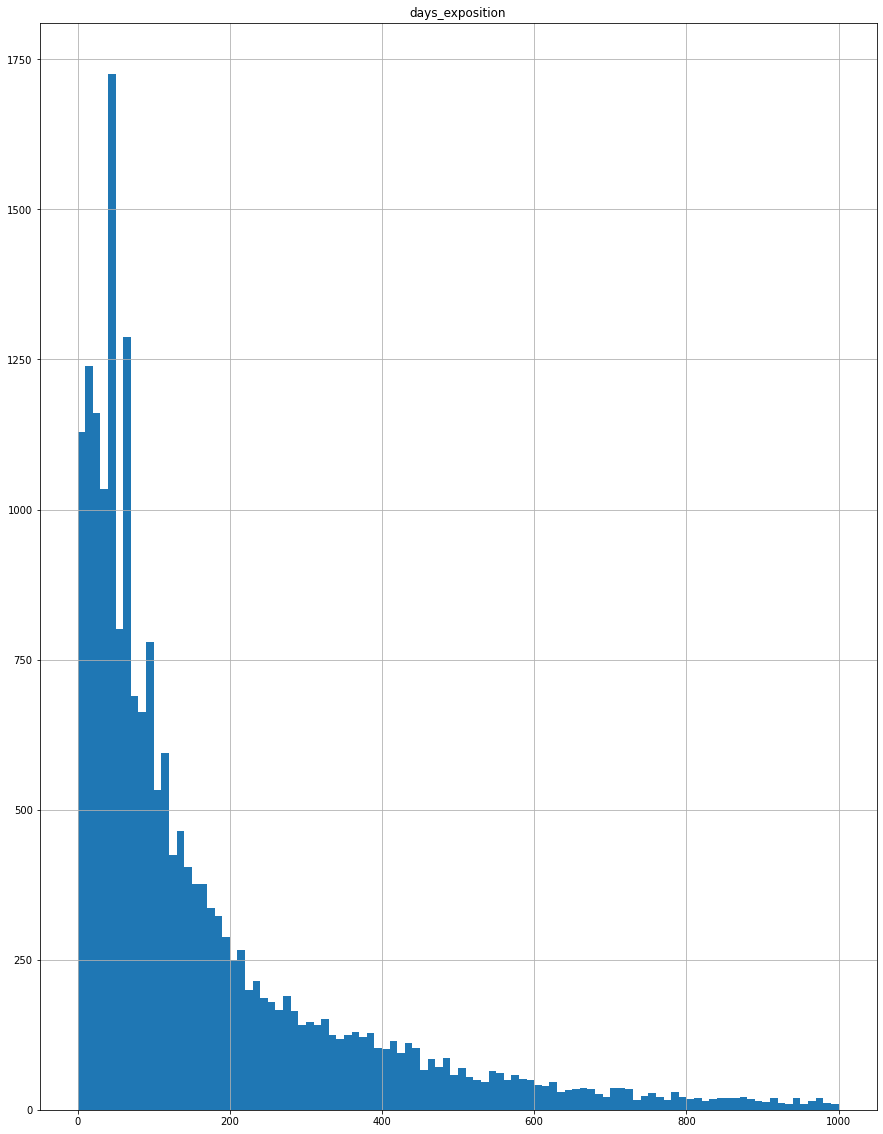

count    20518.000000
mean     180.888634  
std      219.727988  
min      1.000000    
25%      45.000000   
50%      95.000000   
75%      232.000000  
max      1580.000000 
Name: days_exposition, dtype: float64


95.0

In [93]:
plt.title('days_exposition')
data['days_exposition'].hist(bins=100, range=(0,1000), grid = True, figsize=(15,20))
plt.show()
print(data['days_exposition'].describe())
data['days_exposition'].median()

Медианное время продажи квартир составляет 95 дней при среднем 180 суток.Быстрые продажи – до 45 суток. Долгие продажи – более 232 суток.

# 4.3 Исследование зависимости цены м2 от параметров исследования

 Исследование зависимости цены м2 от других параметров

Цена м2 однокомнатных квартир дороже чем цена м2 двукомнатных и трехкомнатных, цены м2 растут от 2-х в прямой зависимости 
от количества комнат.

Определенная зависимость между ценой м2 и общей площади квартир по графику наблюдается от 50 до 150 м2.

Цена м2 падала с 2014 по 2016 годы, затем относительная стабильность в 2016-2018 годах, с 2018 года наблюдается рост цен за м2.

Пики цены м2 наблюдаются в 4-й, 9-й и 12-й месяцы года. Минимумы во 2-й, 6-й и 10-й месяцы года.

В первые четыре дня недели цена была выше чем в остальные. По средам средняя стоимость квартир была выше чем в остальные дни.

По графику исследования видно, цена первых этажей ниже последних, которые, в свою очередь ниже цены других этажей.

Определенная прямая зависимость между ценой м2 и размером жилой площади наблюдается до 70 м2 (ориентировочно по графику)

Наблюдается небольшая прямая зависимость между ценой м2 и площадью кухни.


# 4.4 Средняя цена м2 в 10 населенных пунктах с наибольшим числом объявлений

Средняя цена м2 в 10 населённых пунктах с наибольшим числом объявлений

Определяем первые 10 населенных пунктов с максимальными по количеству продаж

In [94]:
data['locality_name'].value_counts()
i=0
while i < 10:
    print(data['locality_name'].value_counts()[i])
    i += 1
    print(data['locality_name'].value_counts().loc[lambda x : x == data['locality_name'].value_counts()[i-1]])


15721
Санкт-Петербург    15721
Name: locality_name, dtype: int64
522
посёлок Мурино    522
Name: locality_name, dtype: int64
440
посёлок Шушары    440
Name: locality_name, dtype: int64
398
Всеволожск    398
Name: locality_name, dtype: int64
369
Пушкин    369
Name: locality_name, dtype: int64
338
Колпино    338
Name: locality_name, dtype: int64
327
посёлок Парголово    327
Name: locality_name, dtype: int64
307
Гатчина    307
Name: locality_name, dtype: int64
299
деревня Кудрово    299
Name: locality_name, dtype: int64
237
Выборг    237
Name: locality_name, dtype: int64


Определяем среднюю стоимость м2 для первых 10 максимальных продаж

In [95]:

data['locality_name'].value_counts()
i=0
while i < 10:
    #print(data['locality_name'].value_counts()[i])
    i += 1
    #print(data['locality_name'].value_counts().loc[lambda x : x == data['locality_name'].value_counts()[i-1]])

data['price_m2'] = (data['last_price']/data['total_area']).round(2)   
total_price_m2 = 0
for i in range(len(data['locality_name'])):
    if data['locality_name'][i] == "Санкт-Петербург":
        total_price_m2 += data['price_m2'][i]
mean_price_m2 = total_price_m2/data['locality_name'].value_counts().loc[lambda x : x == data['locality_name'].value_counts()[0]]
print(mean_price_m2) 
     
total_price_m2 = 0
for i in range(len(data['locality_name'])):
    if data['locality_name'][i] == "посёлок Мурино":
        total_price_m2 += data['price_m2'][i]
        mean_price_m2 = total_price_m2/data['locality_name'].value_counts().loc[lambda x : x == data['locality_name'].value_counts()[1]]

print(mean_price_m2) 
    
total_price_m2 = 0

for i in range(len(data['locality_name'])):
    if data['locality_name'][i] == "посёлок Шушары":
        total_price_m2 += data['price_m2'][i]
        #print(data['locality_name'][i])
        mean_price_m2 = total_price_m2/data['locality_name'].value_counts().loc[lambda x : x == data['locality_name'].value_counts()[2]]

print(mean_price_m2) 

total_price_m2 = 0

for i in range(len(data['locality_name'])):
    if data['locality_name'][i] == "Всеволожск":
        total_price_m2 += data['price_m2'][i]
        #print(data['locality_name'][i])
        mean_price_m2 = total_price_m2/data['locality_name'].value_counts().loc[lambda x : x == data['locality_name'].value_counts()[3]]

print(mean_price_m2) 

total_price_m2 = 0

for i in range(len(data['locality_name'])):
    if data['locality_name'][i] == "Пушкин":
        total_price_m2 += data['price_m2'][i]
        #print(data['locality_name'][i])
        mean_price_m2 = total_price_m2/data['locality_name'].value_counts().loc[lambda x : x == data['locality_name'].value_counts()[4]]

print(mean_price_m2) 

total_price_m2 = 0

for i in range(len(data['locality_name'])):
    if data['locality_name'][i] == "Колпино":
        total_price_m2 += data['price_m2'][i]
        #print(data['locality_name'][i])
        mean_price_m2 = total_price_m2/data['locality_name'].value_counts().loc[lambda x : x == data['locality_name'].value_counts()[5]]

print(mean_price_m2) 

total_price_m2 = 0

for i in range(len(data['locality_name'])):
    if data['locality_name'][i] == "посёлок Парголово":
        total_price_m2 += data['price_m2'][i]
        #print(data['locality_name'][i])
        mean_price_m2 = total_price_m2/data['locality_name'].value_counts().loc[lambda x : x == data['locality_name'].value_counts()[6]]

print(mean_price_m2) 

total_price_m2 = 0

for i in range(len(data['locality_name'])):
    if data['locality_name'][i] == "Гатчина":
        total_price_m2 += data['price_m2'][i]
        #print(data['locality_name'][i])
        mean_price_m2 = total_price_m2/data['locality_name'].value_counts().loc[lambda x : x == data['locality_name'].value_counts()[7]]

print(mean_price_m2) 

total_price_m2 = 0

for i in range(len(data['locality_name'])):
    if data['locality_name'][i] == "деревня Кудрово":
        total_price_m2 += data['price_m2'][i]
        #print(data['locality_name'][i])
        mean_price_m2 = total_price_m2/data['locality_name'].value_counts().loc[lambda x : x == data['locality_name'].value_counts()[8]]

print(mean_price_m2) 

total_price_m2 = 0

for i in range(len(data['locality_name'])):
    if data['locality_name'][i] == "Выборг":
        total_price_m2 += data['price_m2'][i]
        #print(data['locality_name'][i])
        mean_price_m2 = total_price_m2/data['locality_name'].value_counts().loc[lambda x : x == data['locality_name'].value_counts()[9]]

print(mean_price_m2) 




Санкт-Петербург    114849.008793
Name: locality_name, dtype: float64
посёлок Мурино    85752.189157
Name: locality_name, dtype: float64
посёлок Шушары    78677.364318
Name: locality_name, dtype: float64
Всеволожск    68654.47397
Name: locality_name, dtype: float64
Пушкин    103125.819377
Name: locality_name, dtype: float64
Колпино    75424.579112
Name: locality_name, dtype: float64
посёлок Парголово    90175.913089
Name: locality_name, dtype: float64
Гатчина    68746.146515
Name: locality_name, dtype: float64
деревня Кудрово    92473.547559
Name: locality_name, dtype: float64
Выборг    58141.909325
Name: locality_name, dtype: float64


Для данной группы наибольшая средняя цена м2 в Санкт-Петербурге - 114849,01 руб/м2, далее по цене м2 идут Пушкин - 103125.81 руб.м2, и Кудрово - 92473.54 руб.м2, наименьшая стоимость в Выборге - 58141.91 руб.м2.

Населенные пункты с самой высокой стоимостью 

In [96]:
data.pivot_table(index='locality_name', values='mean_price_m2', aggfunc='max').sort_values(by = 'mean_price_m2', ascending = False).head(10) 


,mean_price_m2
locality_name,
Санкт-Петербург,1.907500e+06
Всеволожск,6.404224e+05
Зеленогорск,3.239437e+05
Пушкин,2.565217e+05
Петергоф,2.259717e+05
Сестрорецк,1.826882e+05
посёлок Репино,1.750000e+05
посёлок Лисий Нос,1.687067e+05
Павловск,1.614286e+05


Населенные пункты с самой низкой стоимостью 

In [97]:
data.pivot_table(index='locality_name', values='mean_price_m2', aggfunc='min').sort_values(by = 'mean_price_m2').head(10) 


,mean_price_m2
locality_name,
Санкт-Петербург,111.834862
посёлок станции Свирь,7962.962963
Сланцы,9615.384615
деревня Старополье,10368.663594
Гатчина,10507.246377
городской посёлок Будогощь,10714.285714
поселок Оредеж,11250.000000
деревня Выскатка,11463.414634
деревня Вахнова Кара,11688.311688


Средняя цена каждого киломметра

<AxesSubplot:xlabel='cityCenters_nearest'>

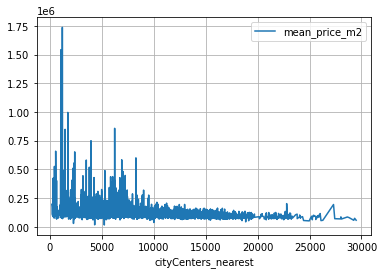

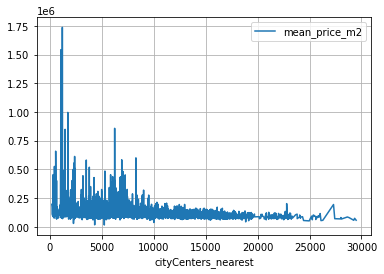

In [98]:
data['mean_price_m2'] = data['last_price']/data['total_area']
data_sankt=data.query('locality_name == "Санкт-Петербург"')
data_sankt.pivot_table(index='cityCenters_nearest', values='mean_price_m2', aggfunc='mean').plot(grid=True)
data_sankt.pivot_table(index='cityCenters_nearest', values='mean_price_m2', aggfunc='median').plot(grid=True)

По графику наблюдается обратная зависимость цены м2 от удалённости от центра.

По графику наблюдается обратная зависимость цены м2 от удалённости от центра. 

Из графика видна обратная зависимость стоимости м2 от удаленности от центра. Границей центра можно считать окружность с радиусом 2км. 

По матрице корреляции

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                23699 non-null  int64         
 1   last_price                  23699 non-null  float64       
 2   total_area                  23699 non-null  float64       
 3   first_day_exposition        23699 non-null  datetime64[ns]
 4   rooms                       23699 non-null  int64         
 5   ceiling_height              14504 non-null  float64       
 6   floors_total                23613 non-null  float64       
 7   living_area                 21796 non-null  float64       
 8   floor                       23699 non-null  int64         
 9   is_apartment                2775 non-null   object        
 10  studio                      23699 non-null  bool          
 11  open_plan                   23699 non-null  bool      

array([[<AxesSubplot:xlabel='cityCenters_nearest', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='living_area', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='mean_price_m2', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='cityCenters_nearest'>],
       [<AxesSubplot:xlabel='cityCenters_nearest', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='mean_price_m2', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='kitchen_area'>],
       [<AxesSubplot:xlabel='cityCenters_nearest', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='mean_price_m2', ylabel='living_area'>,
        

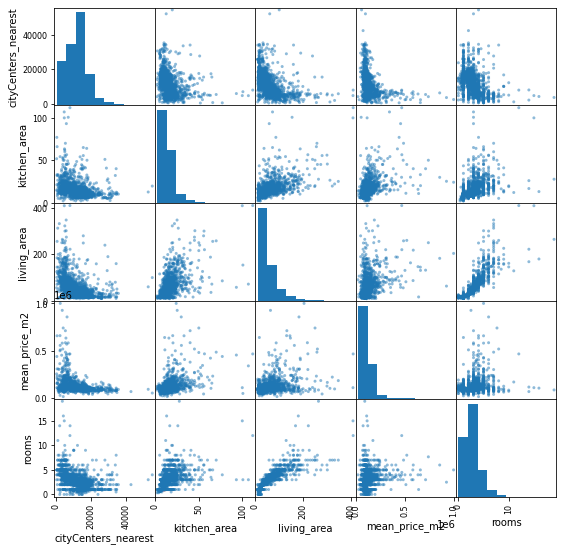

In [99]:
data.info()
data['mean_price_m2'] = data['last_price']/data['total_area']
stat_multi=data.pivot_table(index='total_area',values=['kitchen_area','mean_price_m2','living_area','rooms','cityCenters_nearest'])
print(stat_multi.corr())

pd.plotting.scatter_matrix(stat_multi,figsize=(9,9))

По графикам наблюдается обратная зависимость средней стоимости цены м2 от расстояния до центра, прямая зависимость от площади кухни и жилой площади.зависимость от среднего количества (для 2, 3 комнат)

### Общий вывод

При покупке предпочтение отдается 1, 2 и 3-х комнатным квартирам. Квартиры с нулевым количеством комнат, возможно, студии.
Количество квартир с более чем 6 комнат составляет 0,37% от общего числа.
Количество квартир с нулевым числом комнат составляет 0,83%
Цена м2 однокомнатных квартир дороже чем цена м2 двукомнатных и трехкомнатных, цены м2 растут от 2-х в прямой зависимости от количества комнат.
Зависимости между ценой м2 и общей площади квартир не наблюдается.
Минимальная стоимость м2 составила 111,83 рублей - явный выброс, медианное значение - 96998 руб/м2, максимальная цена - 1 542 605 руб/м2.
Цена м2 падала с 2014 по 2016 годы, затем относительная стабильность в 2016-2018 годах, с 2018 года наблюдается рост цен за м2.
Пики цены м2 в 4-й, 9-й и 12-й месяцы года. Минимумы во 2-й, 6-й и 10-й месяцы года.
В первые четыре дня недели цена была выше чем в остальные.
Цена первых этажей ниже последних, которые, в свою очередь ниже цены других этажей.
Расстояние до центра от населенных пунктов в основном порядка 30 км
Средняя общая площадь квартир 60.35 , минимальная площадь 12 м2, медианная площадь 52 м2, максимальная площадь 900 м2
Зависимости между ценой м2 и размером жилой площади не наблюдается
Медианное время продажи квартир составляет 95 дней при среднем 180 суток.
По графику наблюдается обратная зависимость цены м2 от удалённости от центра.

Действенных выводов сделать не удалось, выводы в основном описательного характера. Необхоимо продолжить исследование.